<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [356]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from ipykernel import kernelapp as app

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [357]:
df = pd.read_csv('/Users/feliperodriguez/Desktop/ECON-628-01-felipe1504/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv', parse_dates=[0])

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

First we take a look at the variables

In [358]:
df.head(3)

Date  Store Number         City Zip Code  County Number      County  \
0 2015-11-04          3717       SUMNER    50674            9.0      Bremer   
1 2016-03-02          2614    DAVENPORT    52807           82.0       Scott   
2 2016-02-11          2106  CEDAR FALLS    50613            7.0  Black Hawk   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   

            Item Description  Bottle Volume (ml) State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750             $4.50   
1                    Tin Cup                 750            $13.75   
2                   Jim Beam                1000            $12.59   

  State Bottle Retail  Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0               $6.75            12         $81.00                   9.0   
1              $20.63             2         $41.26                   1.5   
2              $18.89            24        $453.36                  24.0   

   Volume Sold (Gallons)  
0                   2.38  
1                   0.40  
2                   6.34

In [359]:
df.iloc[:,14:18]

Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0                 12         $81.00                  9.00   
1                  2         $41.26                  1.50   
2                 24        $453.36                 24.00   
3                  6         $85.50                 10.50   
4                 12        $129.60                 21.00   
5                  6        $119.88                 10.50   
6                  3         $29.97                  2.25   
7                  2         $47.26                  3.50   
8                  4         $68.96                  3.00   
9                  2         $22.86                  2.00   
10                 6        $236.16                  4.50   
11                 6         $55.50                 10.50   
12                 1         $13.38                  1.75   
13                12        $180.00                  9.00   
14                12        $135.00                 12.00   
15                 4         $27.00                  3.00   
16                48         $81.60                  9.60   
17                12        $117.00                  9.00   
18                24        $177.12                 24.00   
19                 6         $89.76                 10.50   
20                 2         $42.76                  1.50   
21                12         $94.20                  9.00   
22                12        $126.00                  9.00   
23                12        $188.88                  9.00   
24                12         $60.72                  9.00   
25                24        $644.40                 24.00   
26                 1         $11.03                  0.30   
27                 3         $15.75                  2.25   
28                 6         $98.94                 10.50   
29                 1          $7.35                  0.50   
30                 3          $8.97                  1.12   
31                 2         $36.22                  1.50   
32                12        $129.60                 21.00   
33                12        $137.16                 12.00   
34                 2         $16.14                  1.50   
35                 4         $39.12                  1.50   
36                12         $95.04                 12.00   
37                12        $220.56                  9.00   
38                12        $117.00                  4.50   
39                12        $290.88                 12.00   
40                12        $137.16                 12.00   
41                 4         $32.88                  3.00   
42                12        $124.20                  9.00   
43                 2        $118.50                  1.50   
44                12        $148.68                  9.00   
45                 6         $63.18                 10.50   
46                 6         $64.02                 10.50   
47                 2         $35.26                  2.00   
48                12        $337.56                 12.00   
49                 3         $23.76                  3.00   
50                 3         $83.22                  2.25   
51                 6        $147.06                  6.00   
52                 2         $36.76                  1.50   
53                12        $157.56                  9.00   
54                12         $75.12                 12.00   
55                 6         $58.50                 10.50   
56                 6         $75.06                 10.50   
57                 1         $14.28                  0.75   
58                18        $193.68                 31.50   
59                 1         $13.59                  0.50   
60                 1         $18.75                  0.75   
61                 1         $44.58                  3.00   
62                12        $173.76                  9.00   
63                 2         $30.00                  1.50   
64                 6         $99.00        

Then we take a look at the basic statistics for each of the variables

In [360]:
df.describe().T

count          mean           std         min  \
Store Number           270955.0  3.590264e+03    947.662050     2106.00   
County Number          269878.0  5.723164e+01     27.341205        1.00   
Category               270887.0  1.043888e+06  50182.111075  1011100.00   
Vendor Number          270955.0  2.564344e+02    141.014890       10.00   
Item Number            270955.0  4.597496e+04  52757.043086      168.00   
Bottle Volume (ml)     270955.0  9.248303e+02    493.088489       50.00   
Bottles Sold           270955.0  9.871285e+00     24.040912        1.00   
Volume Sold (Liters)   270955.0  8.981351e+00     28.913690        0.10   
Volume Sold (Gallons)  270955.0  2.372830e+00      7.638182        0.03   

                           25%       50%       75%         max  
Store Number            2604.0   3722.00   4378.00     9023.00  
County Number              NaN       NaN       NaN       99.00  
Category                   NaN       NaN       NaN  1701100.00  
Vendor Number            115.0    260.00    380.00      978.00  
Item Number            26827.0  38176.00  64573.00   995507.00  
Bottle Volume (ml)       750.0    750.00   1000.00     6000.00  
Bottles Sold               2.0      6.00     12.00     2508.00  
Volume Sold (Liters)       1.5      5.25     10.50     2508.00  
Volume Sold (Gallons)      0.4      1.39      2.77      662.54


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

We take a look at the type of data we have in each of the variables, we want to have a dataset witht the proper 
type of data that would be useful for out analysis

In [361]:
print df.shape 
print df.info()

(270955, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtype

We can see that there are some variables that are required to be converted either from floats to integers or from 
objects to floats.

Variables such as Bottle cost, retail and sale must be converted to floats. 

Some other variables such as county number would be better to use it a an integers.

Then we look for missing values

We want to know in whic variables we have missing values

In [362]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

County Number and County have the same amount of missing values, we may say that we have the same missing observations in both variables

### 3.2 Clean the columns

After starting with the data cleaning we need to change the name of the variables so we can work with them in the jupyter notebook

In [363]:
df.rename(columns={
        'Store Number': 'Store_Number', 
        'Zip Code': 'Zip_Code', 
        'County Number': 'County_Number', 
        'Category Name': 'Category_Name', 
        'Vendor Number': 'Vendor_Number', 
        'Item Number': 'Item_Number', 
        'Item Description': 'Item_Description', 
        'State Bottle Cost': 'State_Bottle_Cost',
        'State Bottle Retail': 'State_Bottle_Retail',
        'Bottle Volume (ml)': 'Bottle_Volume_ml', 
        'Bottles Sold': 'Bottles_Sold',
        'Sale (Dollars)': 'Sale_dollars',
        'Volume Sold (Liters)': 'Volume_Sold_Lit', 
        'Volume Sold (Gallons)': 'Volume_Sold_Gall'
    }, inplace=True)

Identifying missing values

df.isnull().sum()

Since we have missing obervations in our counties variable, we may want to try to fill this missing information using the information we have in other variables. If we have information about a particular city and their corresponding county, we will use this county to fill those missing observations. 

So we proceed to look for those cities that have information about our missing observations for county.

In [364]:
iowa = df.copy(deep = True)

We want to sort the data frame looking for missing values

In [365]:
iowa_sorted = iowa.sort(['City', 'County'], ascending=[0,1])
iowa_sorted.head(10)

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Date  Store_Number     City Zip_Code  County_Number   County  \
4976  2015-06-15          4885  ZWINGLE    52079           49.0  Jackson   
6594  2015-12-14          4885  ZWINGLE    52079           49.0  Jackson   
12535 2015-10-05          4885  ZWINGLE    52079           49.0  Jackson   
15360 2015-10-05          4885  ZWINGLE    52079           49.0  Jackson   
21035 2015-06-15          4885  ZWINGLE    52079           49.0  Jackson   
35597 2016-03-14          4885  ZWINGLE    52079           49.0  Jackson   
36333 2016-02-01          4885  ZWINGLE    52079           49.0  Jackson   
37372 2015-05-18          4885  ZWINGLE    52079           49.0  Jackson   
38674 2015-03-02          4885  ZWINGLE    52079           49.0  Jackson   
48660 2015-09-14          4885  ZWINGLE    52079           49.0  Jackson   

        Category                       Category_Name  Vendor_Number  \
4976   1031080.0                      VODKA 80 PROOF            297   
6594   1012300.0                      IRISH WHISKIES            370   
12535  1031080.0                      VODKA 80 PROOF            300   
15360  1081600.0                     WHISKEY LIQUEUR            421   
21035  1062300.0                        FLAVORED RUM             35   
35597  1082900.0  MISC. IMPORTED CORDIALS & LIQUEURS            192   
36333  1032080.0                      IMPORTED VODKA            370   
37372  1032080.0                      IMPORTED VODKA            370   
38674  1081600.0                     WHISKEY LIQUEUR            421   
48660  1062310.0                          SPICED RUM            259   

       Item_Number              Item_Description  Bottle_Volume_ml  \
4976         35926        Five O'clock PET Vodka               750   
6594         15644                       Jameson               375   
12535        36903               Mccormick Vodka               200   
15360        64864      Fireball Cinnamon Whisky               375   
21035        43136                 Bacardi Limon               750   
35597        65254          Jagermeister Liqueur               375   
36333        34006  Absolut Swedish Vodka 80 Prf               750   
37372        34003  Absolut Swedish Vodka 80 Prf               200   
38674        64864      Fireball Cinnamon Whisky               375   
48660        43026     Admiral Nelson Spiced Rum               750   

      State_Bottle_Cost State_Bottle_Retail  Bottles_Sold Sale_dollars  \
4976              $3.37               $5.06            24      $121.44   
6594              $6.74              $10.11             3       $30.33   
12535             $1.13               $1.70            48       $81.60   
15360             $5.33               $8.00            24      $192.00   
21035             $8.26              $12.39             4       $49.56   
35597             $6.52               $9.78            24      $234.72   
36333            $11.49              $17.24             3       $51.72   
37372             $3.99               $5.99             6       $35.94   
38674             $5.33               $8.00            24      $192.00   
48660             $5.78               $8.67            12      $104.04   

       Volume_Sold_Lit  Volume_Sold_Gall  
4976             18.00              4.76  
6594              1.12              0.30  
12535             9.60              2.54  
15360             9.00              2.38  
21035             3.00              0.79  
35597             9.00              2.38  
36333             2.25              0.59  
37372             1.20              0.32  
38674             9.00              2.38  
48660             9.00              2.38

Then we want to group the data by city and county to look for those cities that have more than one county  and then match them with their corresponding county. 

In [366]:
pd.set_option('display.max_rows', 400)
iowa.groupby(['City', 'County'])[['County_Number']].count() 

County_Number
City              County                      
ACKLEY            Hardin                    57
                  Webster                   34
ADAIR             Adair                     43
ADEL              Dallas                   318
AFTON             Union                     12
AKRON             Plymouth                  69
ALBIA             Monroe                   342
ALDEN             Hardin                   122
ALGONA            Kossuth                 1025
ALLISON           Butler                    83
ALTA              Buena Vista               14
ALTOONA           Polk                    2104
AMES              Story                   7548
ANAMOSA           Jones                    583
ANITA             Cass                     149
ANKENY            Polk                    4836
ANTHON            Woodbury                 164
ARLINGTON         Fayette                   76
ARMSTRONG         Emmet                     17
ARNOLD'S PARK     Dickinson                242
ARNOLDS PARK      Dickinson                498
ATLANTIC          Cass                    1041
AUDUBON           Audubon                  205
AURELIA           Cherokee                  11
AVOCA             Pottawattamie            457
BALDWIN           Jackson                   26
BANCROFT          Kossuth                  371
BAXTER            Jasper                    58
BEDFORD           Taylor                   157
BELLE PLAINE      Benton                   414
BELLEVUE          Jackson                  238
BELMOND           Wright                   181
BETTENDORF        Iowa                     321
                  Scott                   3388
BEVINGTON         Madison                   74
BLOOMFIELD        Davis                    203
BLUE GRASS        Scott                    425
BONDURANT         Polk                     363
BOONE             Boone                   1443
BRITT             Hancock                  157
BROOKLYN          Poweshiek                194
BUFFALO           Scott                     36
BUFFALO CENTER    Winnebago                151
BURLINGTON        Des Moines              3144
BUSSEY            Marion                    16
CAMANCHE          Clinton                  139
CAMBRIDGE         Polk                      51
CARLISLE          Warren                   182
CARROLL           Carroll                 1480
CARTER LAKE       Pottawattamie            165
CASCADE           Dubuque                  150
CASEY             Guthrie                   37
CEDAR FALLS       Black Hawk              5735
CEDAR RAPIDS      Linn                   18778
CENTER POINT      Linn                     175
CENTERVILLE       Appanoose                976
CENTRAL CITY      Linn                     132
CHARITON          Lucas                    476
CHARLES CITY      Floyd                    825
CHEROKEE          Cherokee                 790
CLARINDA          Page                     511
CLARION           Wright                   166
CLARKSVILLE       Butler                    66
CLEAR LAKE        Cerro Gordo             2083
CLINTON           Clinton                 3084
CLIVE             Dallas                   160
                  Polk                     775
COLFAX            Jasper                   192
COLO              Story                     27
COLUMBUS JUNCTION Louisa                   290
CONRAD            Grundy                    99
COON RAPIDS       Carroll                  118
CORALVILLE        Johnson                 3457
CORNING           Adams                    234
                  Clayton                  210
CORWITH           Hancock                   30
CORYDON           Wayne                    130
COUNCIL BLUFFS    Pottawattamie           8060
CRESCENT          Pottawattamie             26
CRESCO            Howard                   559
CRESTON           Union                   1061
Carroll           Carroll                    1
Cumming           Warren                     6
DAKOTA CITY       Humboldt            

In [367]:
print iowa[iowa["City"]=='ACKLEY'].count()["City"]
print iowa[iowa["City"]=='BETTENDORF'].count()["City"]
print iowa[iowa["City"]=='CLIVE'].count()["City"]
print iowa[iowa["City"]=='CORNING'].count()["City"]
print iowa[iowa["City"]=='FORT DODGE'].count()["City"]
print iowa[iowa["City"]=='NEWTON'].count()["City"]
print iowa[iowa["City"]=='NORTH LIBERTY'].count()["City"]
print iowa[iowa["City"]=='OSKALOOSA'].count()["City"]
print iowa[iowa["City"]=='PERRY'].count()["City"]
print iowa[iowa["City"]=='STATE CENTER'].count()["City"]
print iowa[iowa["City"]=='WEST DES MOINES'].count()["City"]

105
3709
935
444
2989
2544
1321
1516
815
170
7162


Here we can see the cities that have multiple counties, therefore we can use this cities to fill the missing observations in counties if those missing observations belong to these cities. We are only able to this beacause the variables for city does not have any missing observation.

Then I fill the missing values with an identifier that can be used to set a condition for the replacement of the missing values 

In [368]:
iowa['County'].fillna("missing", inplace=True)

iowa.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County_Number          1077
County                    0
Category                 68
Category_Name           632
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_ml          0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_dollars              0
Volume_Sold_Lit           0
Volume_Sold_Gall          0
dtype: int64

In [369]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                   270955 non-null datetime64[ns]
Store_Number           270955 non-null int64
City                   270955 non-null object
Zip_Code               270955 non-null object
County_Number          269878 non-null float64
County                 270955 non-null object
Category               270887 non-null float64
Category_Name          270323 non-null object
Vendor_Number          270955 non-null int64
Item_Number            270955 non-null int64
Item_Description       270955 non-null object
Bottle_Volume_ml       270955 non-null int64
State_Bottle_Cost      270955 non-null object
State_Bottle_Retail    270955 non-null object
Bottles_Sold           270955 non-null int64
Sale_dollars           270955 non-null object
Volume_Sold_Lit        270955 non-null float64
Volume_Sold_Gall       270955 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), objec

We know that in the cities Ackley, Fort Dodge and North Liberty where we cannot replace the missing values
because we migh get assigned to incorrect county since both County name and COunty number are missing.

In this case we want to drop these observations

In [370]:
iowa = iowa[(iowa['County'] != "missing") | (iowa['City'] != "ACKLEY")]
iowa = iowa[(iowa['County'] != "missing") | (iowa['City'] != "FORT DODGE")]
iowa = iowa[(iowa['County'] != "missing") | (iowa['City'] != "NORTH LIBERTY")]
iowa.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County_Number          1043
County                    0
Category                 68
Category_Name           630
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_ml          0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_dollars              0
Volume_Sold_Lit           0
Volume_Sold_Gall          0
dtype: int64

Then we want to check at the count again

In [371]:
print iowa[iowa["City"]=='ACKLEY'].count()["City"]
print iowa[iowa["City"]=='BETTENDORF'].count()["City"]
print iowa[iowa["City"]=='CLIVE'].count()["City"]
print iowa[iowa["City"]=='CORNING'].count()["City"]
print iowa[iowa["City"]=='FORT DODGE'].count()["City"]
print iowa[iowa["City"]=='NEWTON'].count()["City"]
print iowa[iowa["City"]=='NORTH LIBERTY'].count()["City"]
print iowa[iowa["City"]=='OSKALOOSA'].count()["City"]
print iowa[iowa["City"]=='PERRY'].count()["City"]
print iowa[iowa["City"]=='STATE CENTER'].count()["City"]
print iowa[iowa["City"]=='WEST DES MOINES'].count()["City"]

91
3709
935
444
2983
2544
1307
1516
815
170
7162


Now we are sure that we have one county per one city and we also have either county or county number to use it a to replace the missing values 

In [372]:
iowa['county'] = iowa.groupby('City')['County'].transform('first')
iowa['County_Number'] = iowa.groupby('City')['County_Number'].transform('first')

iowa.isnull().sum()

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County_Number           12
County                   0
Category                68
Category_Name          630
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_ml         0
State_Bottle_Cost        0
State_Bottle_Retail      0
Bottles_Sold             0
Sale_dollars             0
Volume_Sold_Lit          0
Volume_Sold_Gall         0
county                   0
dtype: int64

Now I want to check that we have the same categories so I am checking if category names match category numbers

In [373]:
iowa.Category.fillna(9999, inplace=True)
iowa.isnull().sum()

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County_Number           12
County                   0
Category                 0
Category_Name          630
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_ml         0
State_Bottle_Cost        0
State_Bottle_Retail      0
Bottles_Sold             0
Sale_dollars             0
Volume_Sold_Lit          0
Volume_Sold_Gall         0
county                   0
dtype: int64

In [374]:
iowa = iowa[iowa.Category !=9999]
iowa.isnull().sum()

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County_Number           12
County                   0
Category                 0
Category_Name          562
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_ml         0
State_Bottle_Cost        0
State_Bottle_Retail      0
Bottles_Sold             0
Sale_dollars             0
Volume_Sold_Lit          0
Volume_Sold_Gall         0
county                   0
dtype: int64

Now I convert from floats to integers

In [375]:
iowa.Category = [int(float(x)) for x in iowa.Category]

Then I create category name after replacing the missing values

In [376]:
iowa['Category_Name'] = iowa.groupby('Item_Number')['Category_Name'].transform('first')
iowa.isnull().sum()

Date                    0
Store_Number            0
City                    0
Zip_Code                0
County_Number          12
County                  0
Category                0
Category_Name          10
Vendor_Number           0
Item_Number             0
Item_Description        0
Bottle_Volume_ml        0
State_Bottle_Cost       0
State_Bottle_Retail     0
Bottles_Sold            0
Sale_dollars            0
Volume_Sold_Lit         0
Volume_Sold_Gall        0
county                  0
dtype: int64

Then I drop missing observations

In [377]:
iowa.dropna(axis=0, inplace=True)
iowa.isnull().sum()

Date                   0
Store_Number           0
City                   0
Zip_Code               0
County_Number          0
County                 0
Category               0
Category_Name          0
Vendor_Number          0
Item_Number            0
Item_Description       0
Bottle_Volume_ml       0
State_Bottle_Cost      0
State_Bottle_Retail    0
Bottles_Sold           0
Sale_dollars           0
Volume_Sold_Lit        0
Volume_Sold_Gall       0
county                 0
dtype: int64

The I proceed to convert the variables to a more proper form

In [378]:
iowa['Zip_Code'] = pd.to_numeric(iowa['Zip_Code'], errors='coerce')
###http://stackoverflow.com/questions/15891038/pandas-change-data-type-of-columns

In [379]:
iowa['State_Bottle_Cost'] = iowa['State_Bottle_Cost'].str.replace('$','')

In [380]:
iowa['State_Bottle_Retail'] = iowa['State_Bottle_Retail'].str.replace('$','')

In [381]:
iowa['Sale_dollars'] = iowa['Sale_dollars'].str.replace('$','')

In [382]:
iowa['Sale_dollars'] = pd.to_numeric(iowa['Sale_dollars'], errors='coerce')

In [383]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 19 columns):
Date                   270831 non-null datetime64[ns]
Store_Number           270831 non-null int64
City                   270831 non-null object
Zip_Code               270615 non-null float64
County_Number          270831 non-null float64
County                 270831 non-null object
Category               270831 non-null int64
Category_Name          270831 non-null object
Vendor_Number          270831 non-null int64
Item_Number            270831 non-null int64
Item_Description       270831 non-null object
Bottle_Volume_ml       270831 non-null int64
State_Bottle_Cost      270831 non-null object
State_Bottle_Retail    270831 non-null object
Bottles_Sold           270831 non-null int64
Sale_dollars           270831 non-null float64
Volume_Sold_Lit        270831 non-null float64
Volume_Sold_Gall       270831 non-null float64
county                 270831 non-null object
dtypes: 

In [384]:
iowa.County_Number = [int(float(x)) for x in iowa.County_Number]

In [385]:
print iowa.shape 
print iowa.info()

(270831, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 270831 entries, 0 to 270954
Data columns (total 19 columns):
Date                   270831 non-null datetime64[ns]
Store_Number           270831 non-null int64
City                   270831 non-null object
Zip_Code               270615 non-null float64
County_Number          270831 non-null int64
County                 270831 non-null object
Category               270831 non-null int64
Category_Name          270831 non-null object
Vendor_Number          270831 non-null int64
Item_Number            270831 non-null int64
Item_Description       270831 non-null object
Bottle_Volume_ml       270831 non-null int64
State_Bottle_Cost      270831 non-null object
State_Bottle_Retail    270831 non-null object
Bottles_Sold           270831 non-null int64
Sale_dollars           270831 non-null float64
Volume_Sold_Lit        270831 non-null float64
Volume_Sold_Gall       270831 non-null float64
county                 270831 non-null obje


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [386]:
iowa.describe().T

count          mean           std         min  \
Store_Number      270831.0  3.590120e+03    947.589684     2106.00   
Zip_Code          270615.0  5.126409e+04    988.903921    50002.00   
County_Number     270831.0  5.748108e+01     27.239399        1.00   
Category          270831.0  1.043888e+06  50185.706446  1011100.00   
Vendor_Number     270831.0  2.564552e+02    141.017652       10.00   
Item_Number       270831.0  4.594365e+04  52431.157486      168.00   
Bottle_Volume_ml  270831.0  9.248035e+02    492.754771       50.00   
Bottles_Sold      270831.0  9.870901e+00     24.044524        1.00   
Sale_dollars      270831.0  1.288693e+02    383.028291        1.34   
Volume_Sold_Lit   270831.0  8.980982e+00     28.917563        0.10   
Volume_Sold_Gall  270831.0  2.372733e+00      7.639205        0.03   

                         25%         50%         75%         max  
Store_Number         2604.00     3722.00     4377.50     9023.00  
Zip_Code                 NaN         NaN         NaN    56201.00  
County_Number          31.00       63.00       77.00       99.00  
Category          1012200.00  1031200.00  1062310.00  1701100.00  
Vendor_Number         115.00      260.00      380.00      978.00  
Item_Number         26828.00    38176.00    64573.00   995507.00  
Bottle_Volume_ml      750.00      750.00     1000.00     6000.00  
Bottles_Sold            2.00        6.00       12.00     2508.00  
Sale_dollars           30.45       70.56      135.00    36392.40  
Volume_Sold_Lit         1.50        5.25       10.50     2508.00  
Volume_Sold_Gall        0.40        1.39        2.77      662.54

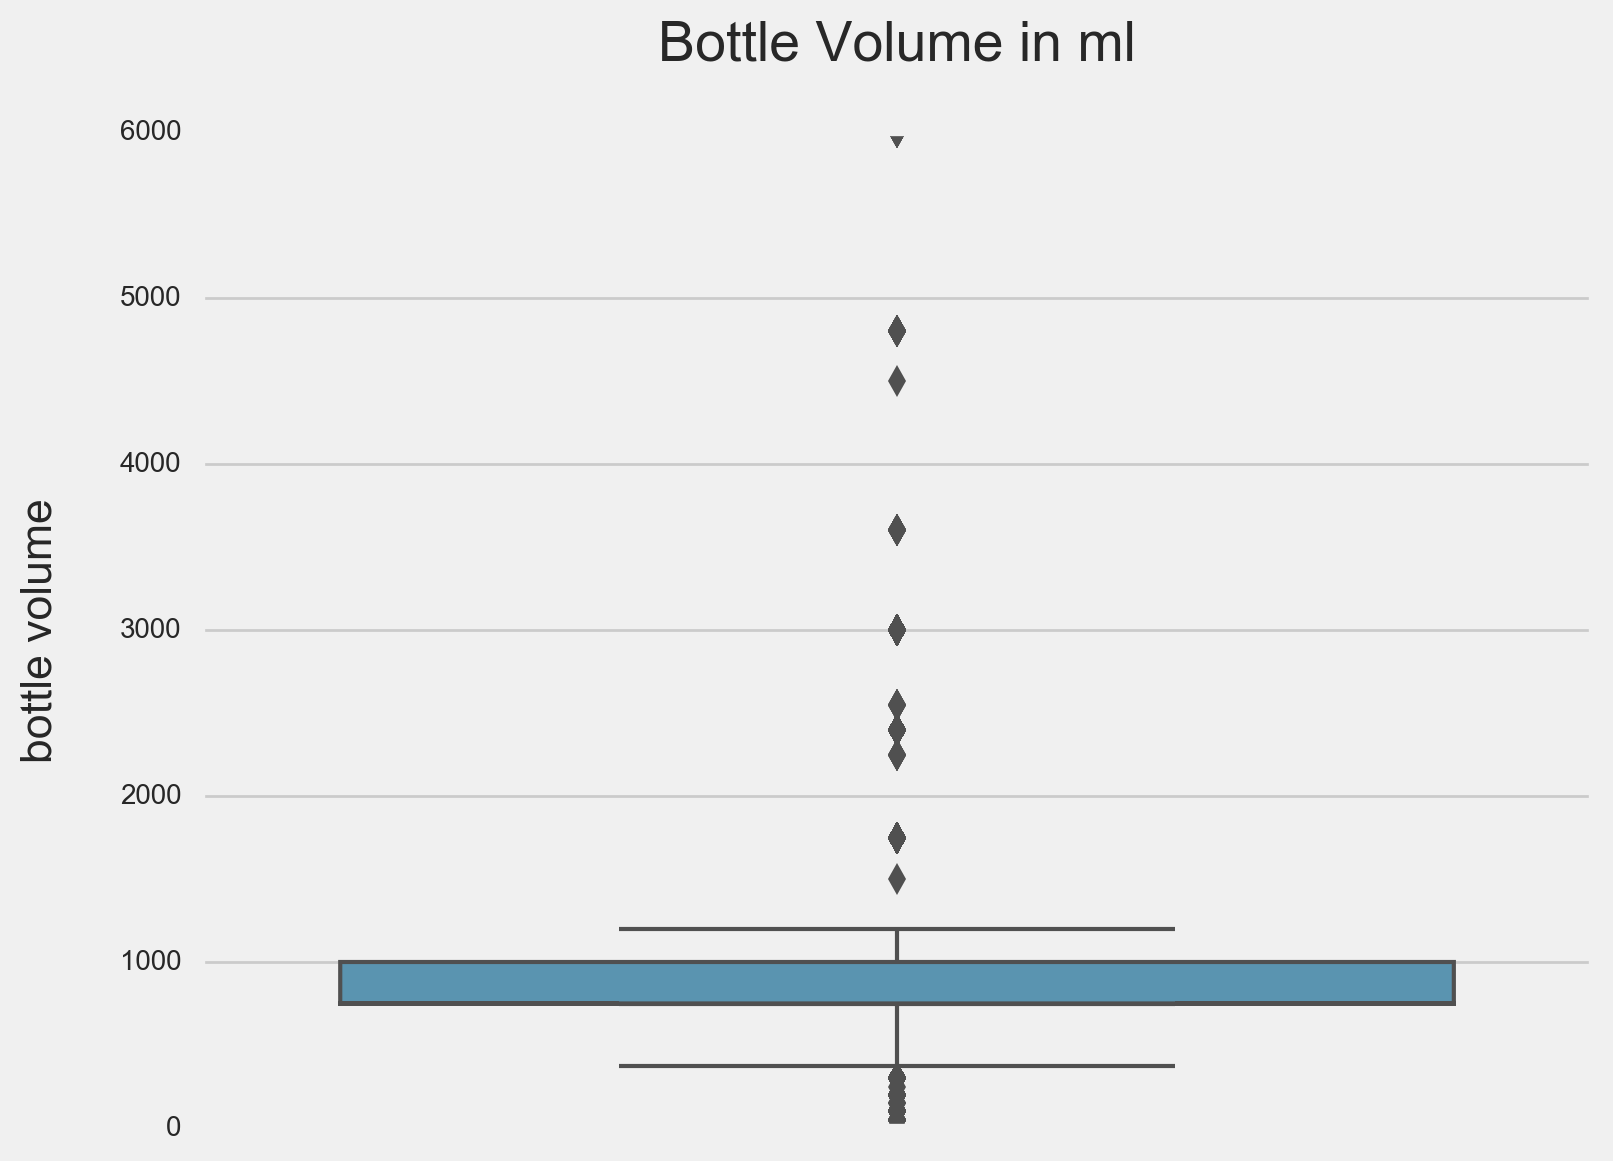

In [387]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa.Bottle_Volume_ml, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('bottle volume\n', fontsize=16)
ax.set_title('Bottle Volume in ml\n', fontsize=20)

plt.show()

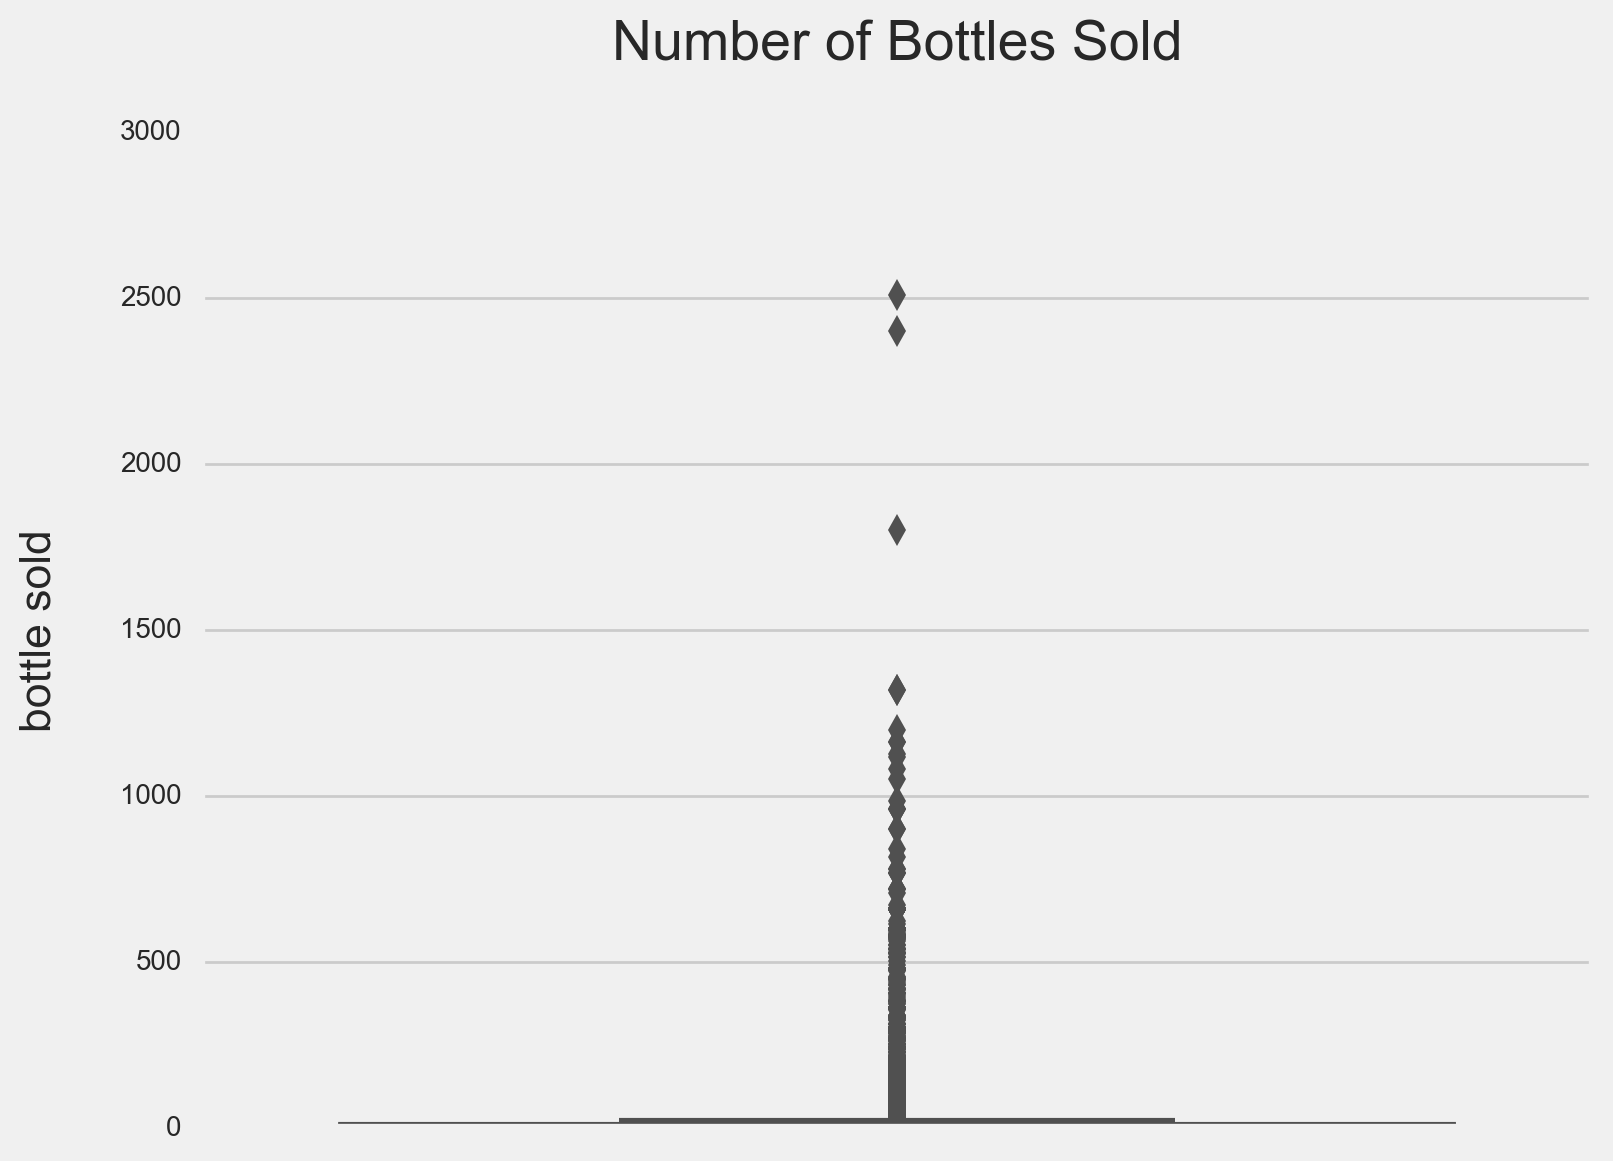

In [388]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa.Bottles_Sold, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('bottle sold\n', fontsize=16)
ax.set_title('Number of Bottles Sold\n', fontsize=20)

plt.show()

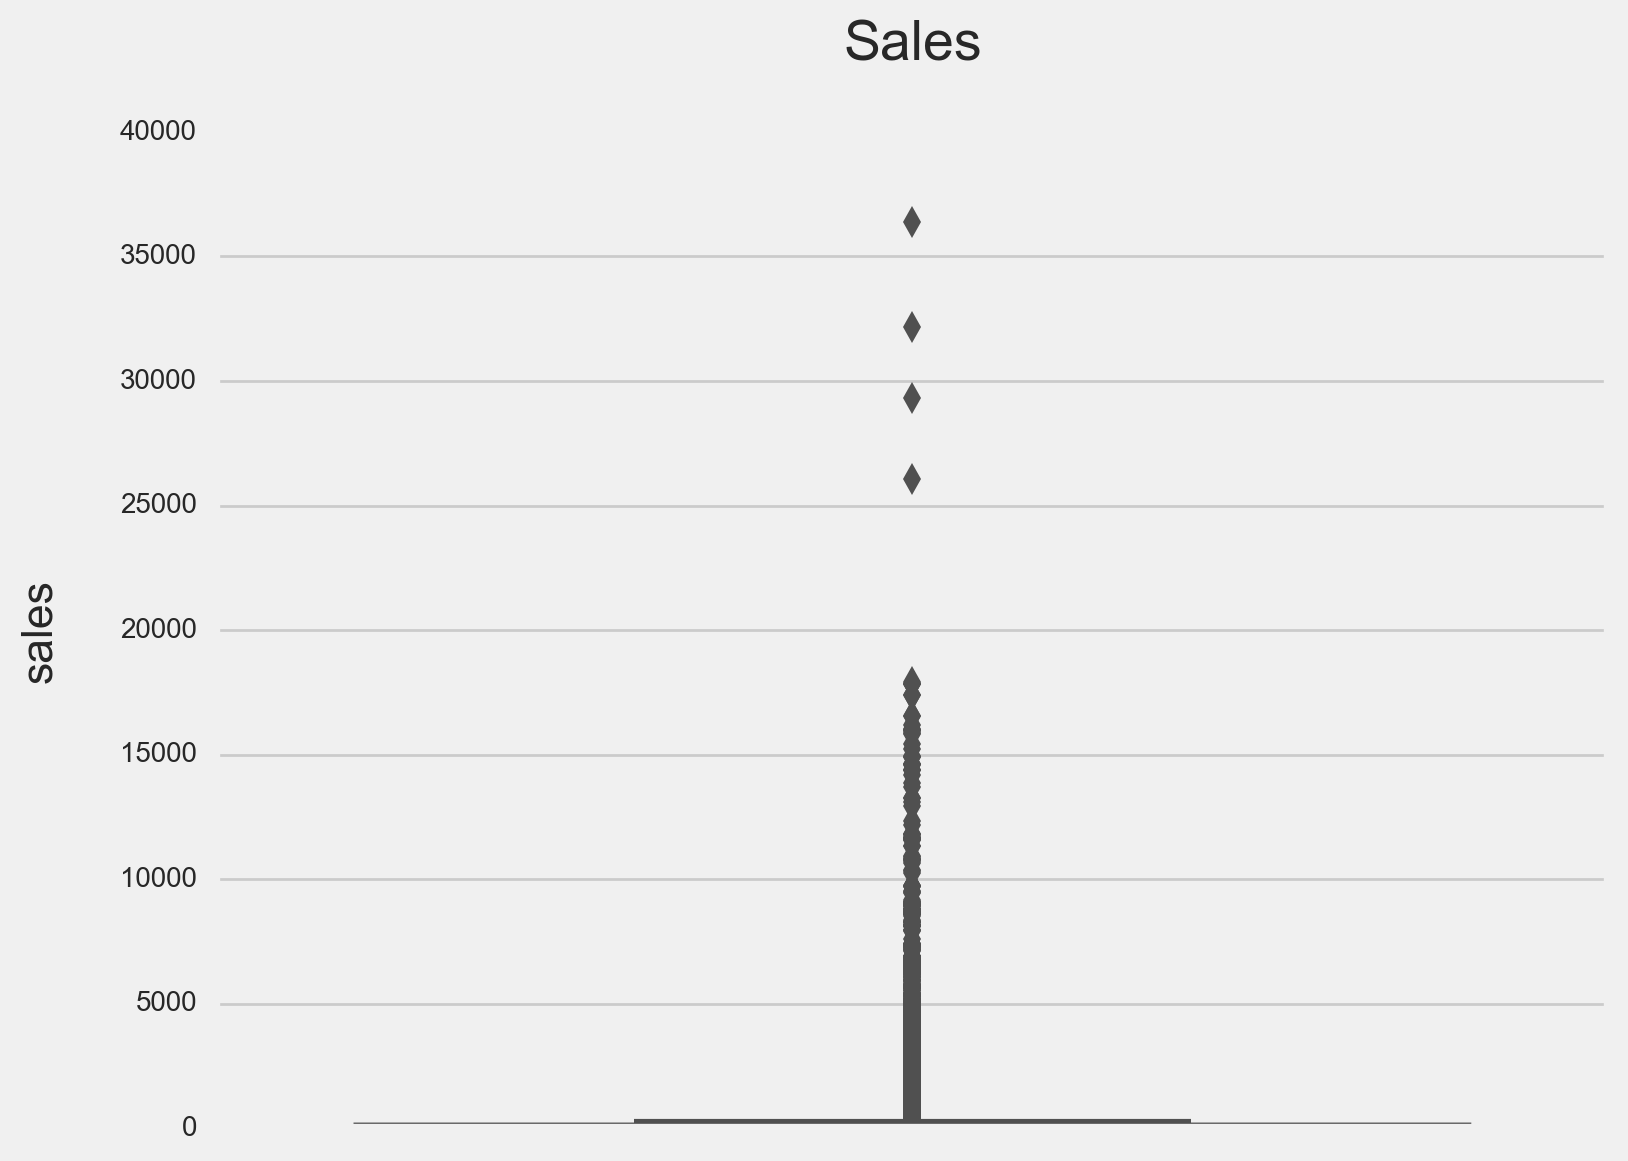

In [389]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa.Sale_dollars, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('sales\n', fontsize=16)
ax.set_title('Sales\n', fontsize=20)

plt.show()

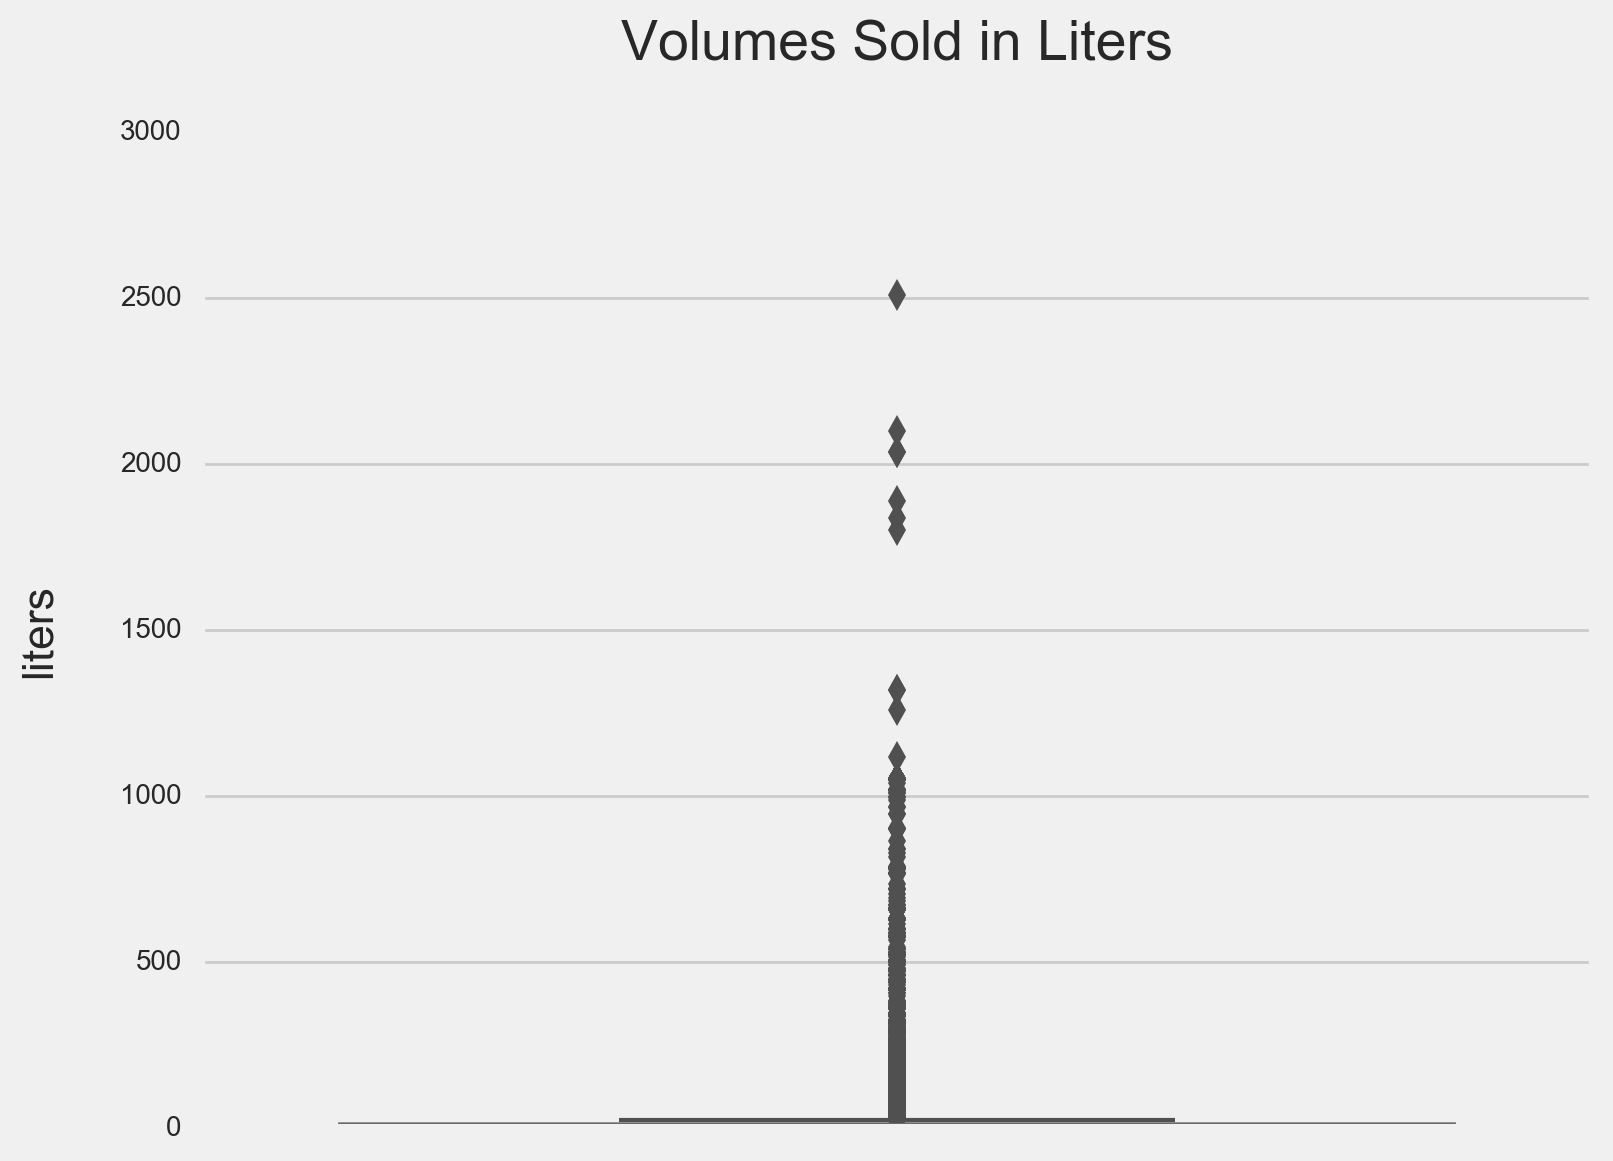

In [390]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa.Volume_Sold_Lit, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('liters\n', fontsize=16)
ax.set_title('Volumes Sold in Liters\n', fontsize=20)

plt.show()

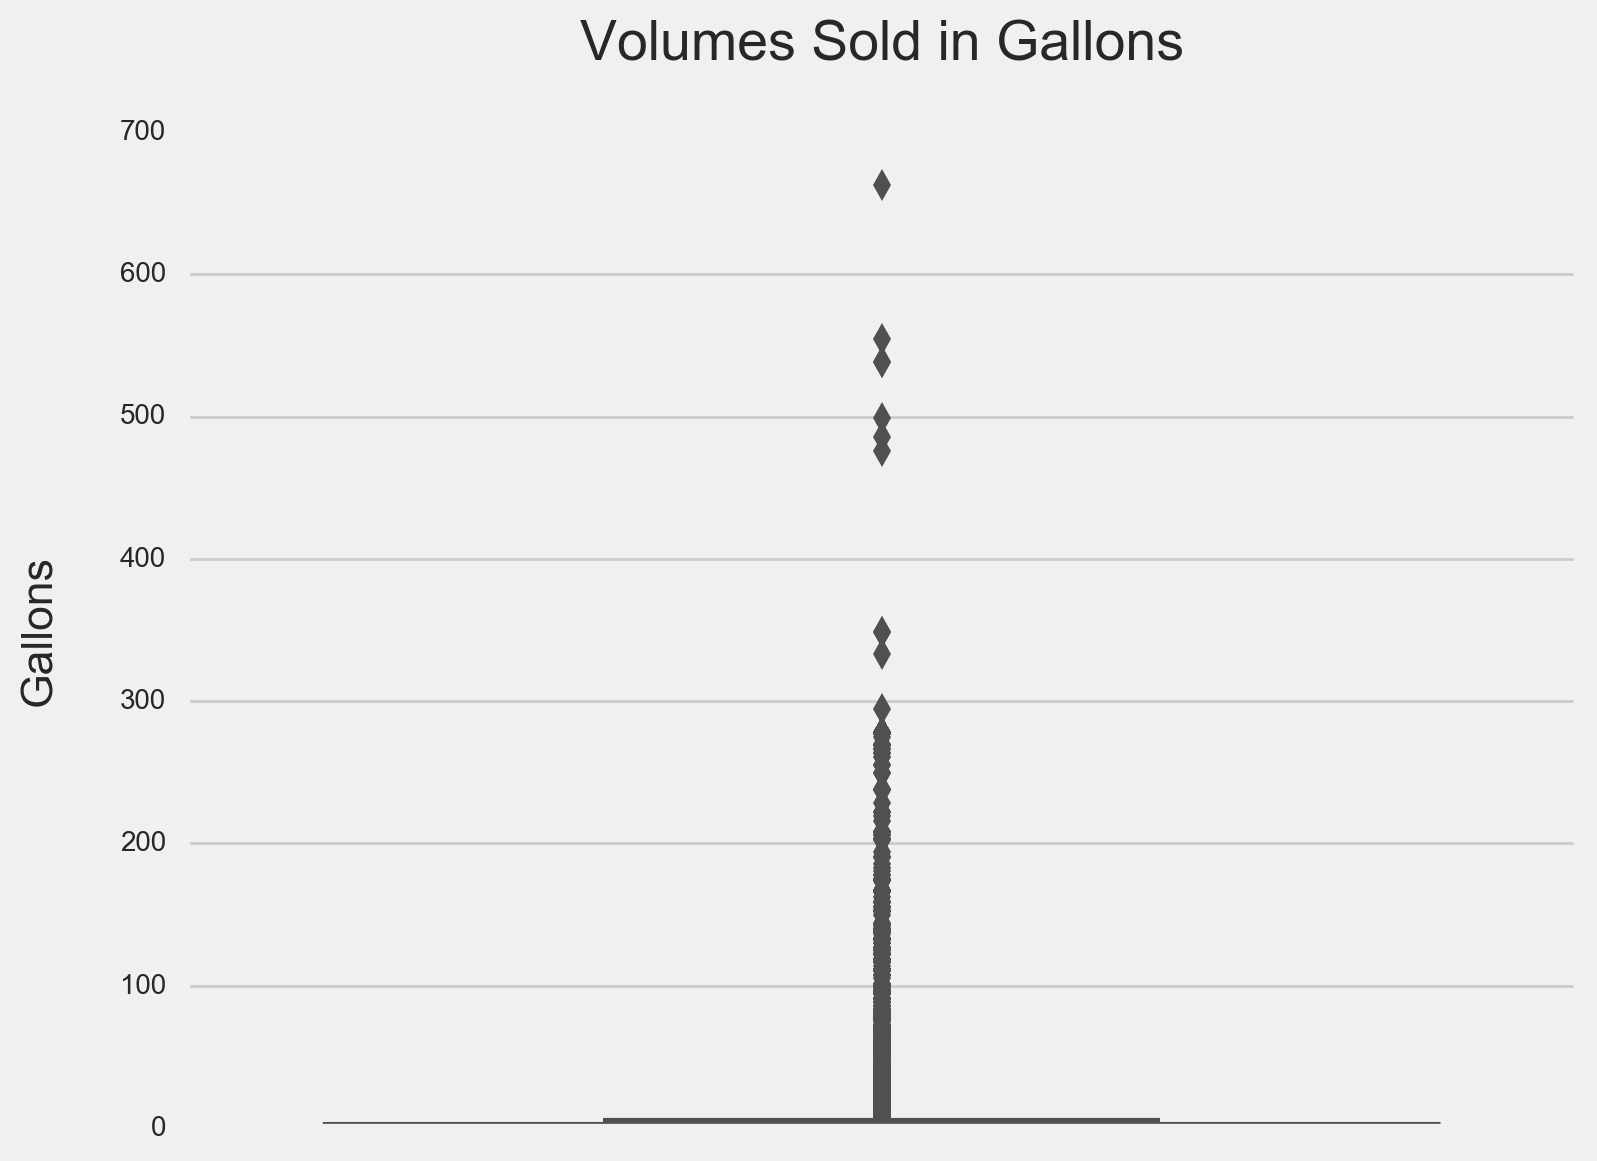

In [391]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowa.Volume_Sold_Gall, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Gallons\n', fontsize=16)
ax.set_title('Volumes Sold in Gallons\n', fontsize=20)

plt.show()

One way to aproach the problem of outliers is to keep only those observations that are within standard deviation of 5

In [392]:
iowan = iowa[((iowa.Bottles_Sold - iowa['Bottles_Sold'].mean()) / iowa['Bottles_Sold'].std()).abs() < 5]

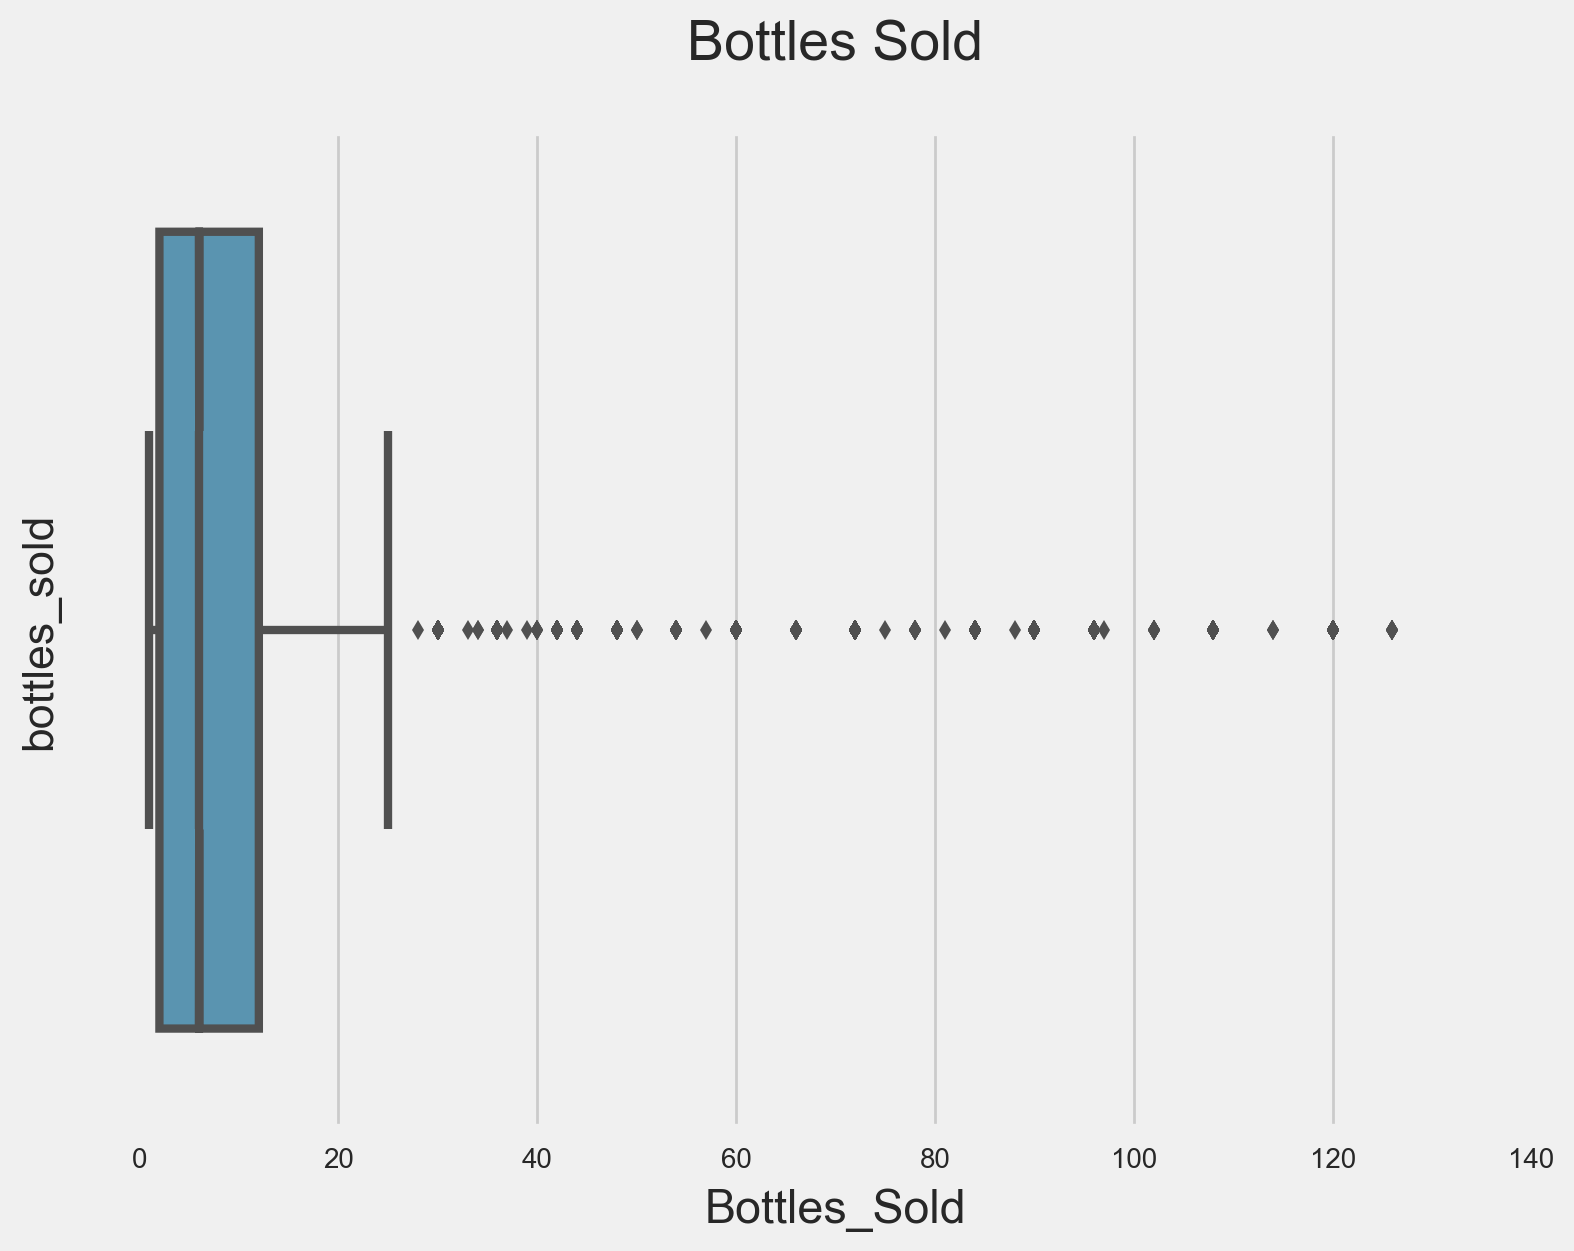

In [393]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowan.Bottles_Sold, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('bottles_sold\n', fontsize=16)
ax.set_title('Bottles Sold\n', fontsize=20)

plt.show()

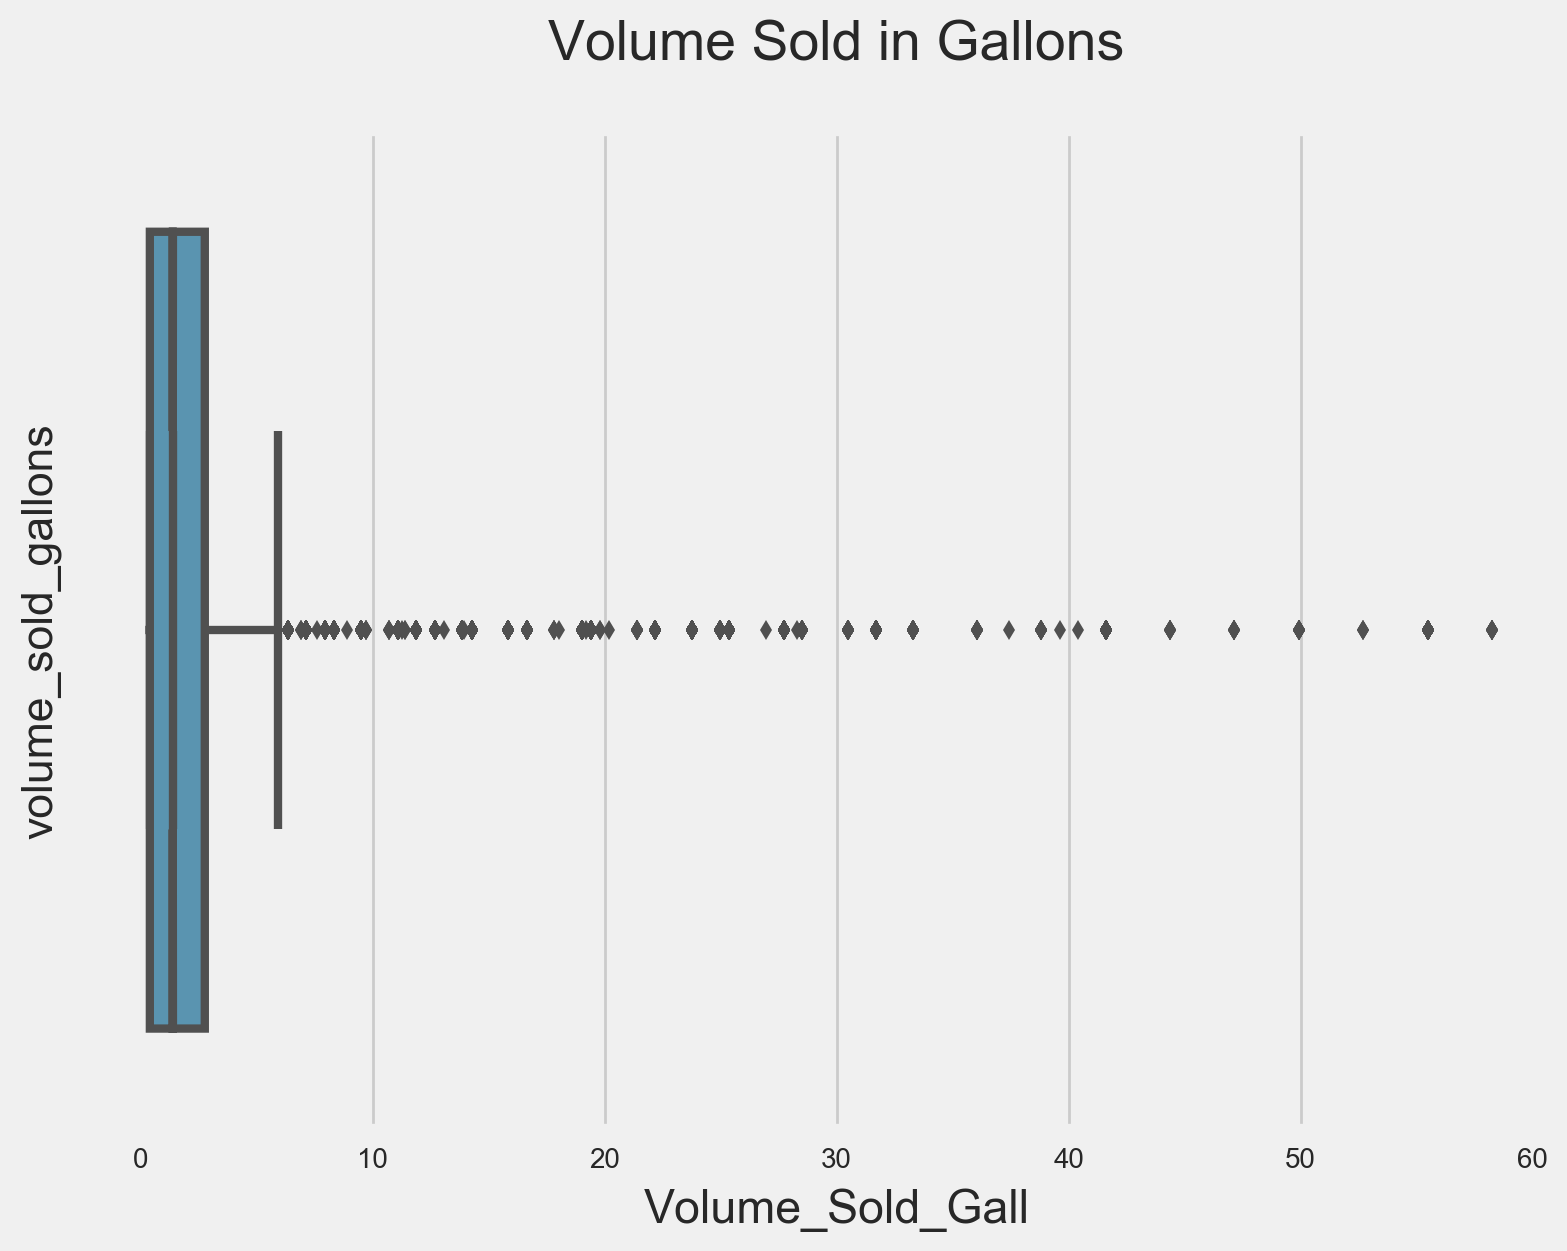

In [394]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(iowan.Volume_Sold_Gall, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('volume_sold_gallons\n', fontsize=16)
ax.set_title('Volume Sold in Gallons\n', fontsize=20)

plt.show()

In [395]:
iowan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269795 entries, 0 to 270954
Data columns (total 19 columns):
Date                   269795 non-null datetime64[ns]
Store_Number           269795 non-null int64
City                   269795 non-null object
Zip_Code               269579 non-null float64
County_Number          269795 non-null int64
County                 269795 non-null object
Category               269795 non-null int64
Category_Name          269795 non-null object
Vendor_Number          269795 non-null int64
Item_Number            269795 non-null int64
Item_Description       269795 non-null object
Bottle_Volume_ml       269795 non-null int64
State_Bottle_Cost      269795 non-null object
State_Bottle_Retail    269795 non-null object
Bottles_Sold           269795 non-null int64
Sale_dollars           269795 non-null float64
Volume_Sold_Lit        269795 non-null float64
Volume_Sold_Gall       269795 non-null float64
county                 269795 non-null object
dtypes: da

We have dropped 1039 observations in total


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [396]:
iowa = iowan

In [397]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269795 entries, 0 to 270954
Data columns (total 19 columns):
Date                   269795 non-null datetime64[ns]
Store_Number           269795 non-null int64
City                   269795 non-null object
Zip_Code               269579 non-null float64
County_Number          269795 non-null int64
County                 269795 non-null object
Category               269795 non-null int64
Category_Name          269795 non-null object
Vendor_Number          269795 non-null int64
Item_Number            269795 non-null int64
Item_Description       269795 non-null object
Bottle_Volume_ml       269795 non-null int64
State_Bottle_Cost      269795 non-null object
State_Bottle_Retail    269795 non-null object
Bottles_Sold           269795 non-null int64
Sale_dollars           269795 non-null float64
Volume_Sold_Lit        269795 non-null float64
Volume_Sold_Gall       269795 non-null float64
county                 269795 non-null object
dtypes: da

Now we need to create a variable for months to address the problem of inconsistency

In [398]:
iowa['Date'] = pd.to_datetime(iowa['Date'])
iowa['Month'] = iowa['Date'].dt.month
iowa['Year'] = iowa['Date'].dt.year
iowa.set_index('Year')

Date  Store_Number             City  Zip_Code  County_Number  \
Year                                                                      
2015 2015-11-04          3717           SUMNER   50674.0              9   
2016 2016-03-02          2614        DAVENPORT   52807.0             82   
2016 2016-02-11          2106      CEDAR FALLS   50613.0              7   
2016 2016-02-03          2501             AMES   50010.0             85   
2015 2015-08-18          3654          BELMOND   50421.0             99   
2015 2015-04-20          2569     CEDAR RAPIDS   52402.0             57   
2015 2015-08-05          2596          OTTUMWA   52501.0             90   
2015 2015-06-25          3456       CLEAR LAKE   50428.0             17   
2016 2016-01-04          4757        BONDURANT   50035.0             77   
2015 2015-11-10          4346       SHELLSBURG   52332.0              6   
2015 2015-09-28          2648  WEST DES MOINES   50265.0             77   
2015 2015-10-28          2600        OSKALOOSA   52577.0             62   
2015 2015-01-22          3858        DAVENPORT   52806.0             82   
2016 2016-02-29          4673       WEST POINT   52656.0             56   
2016 2016-01-04          2670       CORALVILLE   52241.0             52   
2015 2015-06-10          3717           SUMNER   50674.0              9   
2016 2016-02-25          2130         WATERLOO   50703.0              7   
2015 2015-12-29          2600        OSKALOOSA   52577.0             62   
2015 2015-12-26          4604           NEWTON   50208.0             50   
2015 2015-03-04          2614        DAVENPORT   52807.0             82   
2015 2015-01-16          2590     CEDAR RAPIDS   52402.0             57   
2015 2015-01-13          3942           TOLEDO   52342.0             86   
2015 2015-03-24          3981     SIOUX CENTER   51250.0             84   
2015 2015-11-12          4376       MASON CITY   50401.0             17   
2016 2016-03-14          2618     CEDAR RAPIDS   52402.0             57   
2015 2015-02-03          3390          MILFORD   51351.0             30   
2015 2015-11-23          3565        IOWA CITY   52246.0             52   
2015 2015-04-21          3963   COUNCIL BLUFFS   51501.0             78   
2015 2015-12-01          4375           GRIMES   50111.0             77   
2015 2015-01-14          2545        IOWA CITY   52245.0             52   
2015 2015-04-01          4438             AMES   50010.0             85   
2015 2015-01-12          2555           KEOKUK   52632.0             56   
2015 2015-01-16          2549        INDIANOLA   50125.0             91   
2015 2015-01-13          2644       FORT DODGE   50501.0             94   
2015 2015-06-29          4195           TOLEDO   52342.0             86   
2015 2015-04-02          2626       DES MOINES   50311.0             77   
2015 2015-04-20          2532       DES MOINES   50317.0             77   
2015 2015-06-03          4520           HUXLEY   50124.0             85   
2016 2016-01-27          2637        DAVENPORT   52804.0             82   
2016 2016-03-07          2633       DES MOINES   50320.0             77   
2015 2015-03-31          3808    LA PORTE CITY   50651.0              7   
2015 2015-02-23          2514           MARION   50129.0             57   
2015 2015-10-21          4674             AMES   50010.0             85   
2015 2015-10-28          2502           ANKENY   50021.0             77   
2016 2016-01-28          3678       DES MOINES   50320.0             77   
2015 2015-04-14          4298           DYSART   52224.0             86   
2015 2015-08-06          3713       MASON CITY   50401.0             17   
2015 2015-06-29          4236      EAGLE GROVE   50533.0             99   
2016 2016-01-27          3635            OGDEN   50212.0              8   
2015 2015-01-26          3612        MAQUOKETA   52060.0             49   
2015 2015-06-11          4158          CARROLL   51401.0             14   
2015 2015-04-28          2602     WE

We create a dataset excluding observations from 2016

In [399]:
year_2015 = iowa[(iowa['Year']!=2016)] 
year_2015.head(3)

Date  Store_Number          City  Zip_Code  County_Number  County  \
0 2015-11-04          3717        SUMNER   50674.0              9  Bremer   
4 2015-08-18          3654       BELMOND   50421.0             99  Wright   
5 2015-04-20          2569  CEDAR RAPIDS   52402.0             57    Linn   

   Category      Category_Name  Vendor_Number  Item_Number  ...   \
0   1051100   APRICOT BRANDIES             55        54436  ...    
4   1031080     VODKA 80 PROOF            297        35918  ...    
5   1041100  AMERICAN DRY GINS            205        31473  ...    

  Bottle_Volume_ml  State_Bottle_Cost State_Bottle_Retail Bottles_Sold  \
0              750               4.50                6.75           12   
4             1750               7.20               10.80           12   
5             1750              13.32               19.98            6   

   Sale_dollars  Volume_Sold_Lit  Volume_Sold_Gall  county Month  Year  
0         81.00              9.0              2.38  Bremer    11  2015  
4        129.60             21.0              5.55  Wright     8  2015  
5        119.88             10.5              2.77    Linn     4  2015  

[3 rows x 21 columns]

We want to make sure we dont have any observation from 2016

In [400]:
year_2015.loc[year_2015['Year']==2016]


Empty DataFrame
Columns: [Date, Store_Number, City, Zip_Code, County_Number, County, Category, Category_Name, Vendor_Number, Item_Number, Item_Description, Bottle_Volume_ml, State_Bottle_Cost, State_Bottle_Retail, Bottles_Sold, Sale_dollars, Volume_Sold_Lit, Volume_Sold_Gall, county, Month, Year]
Index: []

[0 rows x 21 columns]

We use the follwing two comands to check how is the best way to read the number of months the store was open

In [401]:
nonunique=year_2015.groupby(['Store_Number', 'Year'])['Month'].unique().reset_index()
nonunique.head(4)

Store_Number  Year                                    Month
0          2106  2015  [8, 3, 7, 1, 12, 10, 4, 9, 5, 2, 6, 11]
1          2113  2015  [10, 5, 3, 12, 6, 7, 1, 9, 11, 2, 8, 4]
2          2130  2015  [10, 11, 1, 8, 12, 6, 7, 5, 2, 4, 3, 9]
3          2152  2015  [11, 12, 7, 8, 1, 3, 5, 10, 6, 9, 2, 4]

In [402]:
balanced=year_2015.groupby(['Store_Number', 'Year'])['Month'].nunique().reset_index()
balanced.head(4)

Store_Number  Year  Month
0          2106  2015     12
1          2113  2015     12
2          2130  2015     12
3          2152  2015     12

In [403]:
year_2015.rename(columns={'Month':'Months'}, inplace=True)

In [404]:
new2015 = pd.merge(year_2015, balanced, on=['Store_Number', 'Year'], how='right')

In [405]:
new2015


Date  Store_Number             City  Zip_Code  County_Number  \
0      2015-11-04          3717           SUMNER   50674.0              9   
1      2015-06-10          3717           SUMNER   50674.0              9   
2      2015-01-21          3717           SUMNER   50674.0              9   
3      2015-11-11          3717           SUMNER   50674.0              9   
4      2015-01-07          3717           SUMNER   50674.0              9   
5      2015-02-18          3717           SUMNER   50674.0              9   
6      2015-08-19          3717           SUMNER   50674.0              9   
7      2015-12-09          3717           SUMNER   50674.0              9   
8      2015-02-04          3717           SUMNER   50674.0              9   
9      2015-12-22          3717           SUMNER   50674.0              9   
10     2015-04-29          3717           SUMNER   50674.0              9   
11     2015-10-28          3717           SUMNER   50674.0              9   
12     2015-04-08          3717           SUMNER   50674.0              9   
13     2015-01-14          3717           SUMNER   50674.0              9   
14     2015-01-07          3717           SUMNER   50674.0              9   
15     2015-11-23          3717           SUMNER   50674.0              9   
16     2015-06-10          3717           SUMNER   50674.0              9   
17     2015-08-05          3717           SUMNER   50674.0              9   
18     2015-10-28          3717           SUMNER   50674.0              9   
19     2015-11-04          3717           SUMNER   50674.0              9   
20     2015-09-16          3717           SUMNER   50674.0              9   
21     2015-09-16          3717           SUMNER   50674.0              9   
22     2015-01-21          3717           SUMNER   50674.0              9   
23     2015-10-28          3717           SUMNER   50674.0              9   
24     2015-02-04          3717           SUMNER   50674.0              9   
25     2015-03-04          3717           SUMNER   50674.0              9   
26     2015-03-25          3717           SUMNER   50674.0              9   
27     2015-04-01          3717           SUMNER   50674.0              9   
28     2015-12-16          3717           SUMNER   50674.0              9   
29     2015-05-13          3717           SUMNER   50674.0              9   
30     2015-05-27          3717           SUMNER   50674.0              9   
31     2015-07-22          3717           SUMNER   50674.0              9   
32     2015-07-15          3717           SUMNER   50674.0              9   
33     2015-05-06          3717           SUMNER   50674.0              9   
34     2015-07-15          3717           SUMNER   50674.0              9   
35     2015-12-29          3717           SUMNER   50674.0              9   
36     2015-09-30          3717           SUMNER   50674.0              9   
37     2015-04-29          3717           SUMNER   50674.0              9   
38     2015-06-03          3717           SUMNER   50674.0              9   
39     2015-09-02          3717           SUMNER   50674.0              9   
40     2015-10-14          3717           SUMNER   50674.0              9   
41     2015-04-01          3717           SUMNER   50674.0              9   
42     2015-05-13          3717           SUMNER   50674.0              9   
43     2015-08-05          3717           SUMNER   50674.0              9   
44     2015-10-07          3717           SUMNER   50674.0              9   
45     2015-11-11          3717           SUMNER   50674.0              9   
46     2015-10-28          3717           SUMNER   50674.0              9   
47     2015-07-15          3717           SUMNER   50674.0              9   
48     2015-09-02          3717           SUMNER   50674.0              9   
49     2015-03-11          3717           SUMNER   50674.0              9   
50     2015-12-29          3717           SUMNER   50674.0              9   
51     20

Now I have a dataset for the stores that were open only during the 2015, but we still have stores that were open only  for a few months

One possible aproach is to exclude those stores that have not been open for more than a quarter of the year, since these store might not be representative

In [406]:
new2015 = new2015[(new2015['Month']).abs() > 2]


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

We need to calculate the sum of sales per store

In [407]:
year_sales = new2015.groupby(['Store_Number'])[['Sale_dollars']].sum()
year_sales

Sale_dollars
Store_Number              
2106             139317.74
2113               9310.22
2130              97164.83
2152               7721.08
2178              24324.18
2190             110948.70
2191             104436.69
2200              22811.55
2205              24623.01
2228              17462.07
2233              29553.34
2238              11762.56
2248              67682.06
2285              76927.11
2290              53945.71
2327              10245.14
2353              41545.93
2367               5010.83
2413              90065.02
2445               7189.48
2448              17740.70
2459               7352.33
2460              30041.34
2465              25831.80
2475               6805.07
2478              19840.65
2487              28900.96
2498               2259.67
2500             122418.75
2501             135982.70
2502             116256.89
2505              61852.55
2506             143431.66
2507              29679.78
2508              99887.76
2509              46935.56
2512             342872.91
2513              60268.48
2514              13817.52
2515             115134.54
2517              73998.92
2518              33453.25
2521              93227.17
2522             105182.55
2523              29074.85
2524              95274.38
2527              52823.09
2528              84844.25
2529              29197.60
2532              51268.31
2535              61509.17
2536              57036.60
2538              51092.51
2539              63944.63
2543              58041.58
2544             119392.27
2545              50195.78
2548              88768.72
2549              66708.76
2550              19825.77
2551              32477.18
2552              92322.48
2553              26164.90
2554              21052.38
2555              65411.31
2556              36268.86
2558              57010.02
2559              12022.75
2560              92613.14
2561             125420.79
2562              37479.77
2564              43659.54
2565              71542.43
2566              30363.02
2567              41914.75
2568              25844.42
2569              45841.65
2571              69649.76
2572              84148.71
2573             113587.25
2575              23572.20
2576              44788.32
2578              62603.34
2579              30280.10
2582              60237.86
2584              45631.00
2585              58070.62
2587              64256.96
2588              92001.25
2590             103913.90
2591              49416.00
2592              15110.90
2593             137671.44
2594              73500.63
2595              50994.70
2596              21399.68
2597              18618.54
2600              20355.99
2601              49169.07
2602              41277.06
2603             129690.55
2604              53845.76
2605              69070.95
2606              38012.27
2607              43372.52
2609               6466.98
2611              36242.75
2612              22949.94
2613              82742.02
2614             117784.23
2616             144367.43
2618              21287.84
2619             143958.96
2620              84158.95
2621              80383.01
2622              61423.39
2623              92121.55
2624              73630.47
2625             159020.14
2626              88834.61
2627              75925.59
2628              14489.19
2629             162156.26
2630              20852.80
2633             585192.70
2635              95384.92
2636              65619.10
2637              82748.32
2641              26887.20
2642              64223.84
2643              69640.14
2644             121301.03
2647             101820.37
2648             150980.42
2649              60272.86
2650              45783.63
2651              75700.39
2652              42034.53
2653              40597.01
2655              11721.06
2656              11880.54
2657               6130.51
2658               4328.83
2660              22505.22
2661              36479.93
2662              39124.65
2663             1

In [408]:
yearly_sales=new2015.groupby(["Store_Number"]).sum()["Sale_dollars"].reset_index()
yearly_sales.rename(columns={
  'Sale_dollars':'sales2015_per_Store'  
   }, inplace=True)
new2015= pd.merge(new2015, yearly_sales, on=['Store_Number'], how='right')
new2015

Date  Store_Number            City  Zip_Code  County_Number  \
0      2015-11-04          3717          SUMNER   50674.0              9   
1      2015-06-10          3717          SUMNER   50674.0              9   
2      2015-01-21          3717          SUMNER   50674.0              9   
3      2015-11-11          3717          SUMNER   50674.0              9   
4      2015-01-07          3717          SUMNER   50674.0              9   
5      2015-02-18          3717          SUMNER   50674.0              9   
6      2015-08-19          3717          SUMNER   50674.0              9   
7      2015-12-09          3717          SUMNER   50674.0              9   
8      2015-02-04          3717          SUMNER   50674.0              9   
9      2015-12-22          3717          SUMNER   50674.0              9   
10     2015-04-29          3717          SUMNER   50674.0              9   
11     2015-10-28          3717          SUMNER   50674.0              9   
12     2015-04-08          3717          SUMNER   50674.0              9   
13     2015-01-14          3717          SUMNER   50674.0              9   
14     2015-01-07          3717          SUMNER   50674.0              9   
15     2015-11-23          3717          SUMNER   50674.0              9   
16     2015-06-10          3717          SUMNER   50674.0              9   
17     2015-08-05          3717          SUMNER   50674.0              9   
18     2015-10-28          3717          SUMNER   50674.0              9   
19     2015-11-04          3717          SUMNER   50674.0              9   
20     2015-09-16          3717          SUMNER   50674.0              9   
21     2015-09-16          3717          SUMNER   50674.0              9   
22     2015-01-21          3717          SUMNER   50674.0              9   
23     2015-10-28          3717          SUMNER   50674.0              9   
24     2015-02-04          3717          SUMNER   50674.0              9   
25     2015-03-04          3717          SUMNER   50674.0              9   
26     2015-03-25          3717          SUMNER   50674.0              9   
27     2015-04-01          3717          SUMNER   50674.0              9   
28     2015-12-16          3717          SUMNER   50674.0              9   
29     2015-05-13          3717          SUMNER   50674.0              9   
30     2015-05-27          3717          SUMNER   50674.0              9   
31     2015-07-22          3717          SUMNER   50674.0              9   
32     2015-07-15          3717          SUMNER   50674.0              9   
33     2015-05-06          3717          SUMNER   50674.0              9   
34     2015-07-15          3717          SUMNER   50674.0              9   
35     2015-12-29          3717          SUMNER   50674.0              9   
36     2015-09-30          3717          SUMNER   50674.0              9   
37     2015-04-29          3717          SUMNER   50674.0              9   
38     2015-06-03          3717          SUMNER   50674.0              9   
39     2015-09-02          3717          SUMNER   50674.0              9   
40     2015-10-14          3717          SUMNER   50674.0              9   
41     2015-04-01          3717          SUMNER   50674.0              9   
42     2015-05-13          3717          SUMNER   50674.0              9   
43     2015-08-05          3717          SUMNER   50674.0              9   
44     2015-10-07          3717          SUMNER   50674.0              9   
45     2015-11-11          3717          SUMNER   50674.0              9   
46     2015-10-28          3717          SUMNER   50674.0              9   
47     2015-07-15          3717          SUMNER   50674.0              9   
48     2015-09-02          3717          SUMNER   50674.0              9   
49     2015-03-11          3717          SUMNER   50674.0              9   
50     2015-12-29          3717          SUMNER   50674.0              9   
51     2015-05-20          3717          SUMNER   50674.0    

In [409]:
new2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216965 entries, 0 to 216964
Data columns (total 23 columns):
Date                   216965 non-null datetime64[ns]
Store_Number           216965 non-null int64
City                   216965 non-null object
Zip_Code               216780 non-null float64
County_Number          216965 non-null int64
County                 216965 non-null object
Category               216965 non-null int64
Category_Name          216965 non-null object
Vendor_Number          216965 non-null int64
Item_Number            216965 non-null int64
Item_Description       216965 non-null object
Bottle_Volume_ml       216965 non-null int64
State_Bottle_Cost      216965 non-null object
State_Bottle_Retail    216965 non-null object
Bottles_Sold           216965 non-null int64
Sale_dollars           216965 non-null float64
Volume_Sold_Lit        216965 non-null float64
Volume_Sold_Gall       216965 non-null float64
county                 216965 non-null object
Months    

In [410]:
print yearly_sales.head(10)

   Store_Number  sales2015_per_Store
0          2106            139317.74
1          2113              9310.22
2          2130             97164.83
3          2152              7721.08
4          2178             24324.18
5          2190            110948.70
6          2191            104436.69
7          2200             22811.55
8          2205             24623.01
9          2228             17462.07


### 5.2 Calculate the profit each store is making in 2015.


In [411]:
new2015.State_Bottle_Cost = [float(str(x)) for x in new2015.State_Bottle_Cost]
new2015.State_Bottle_Retail = [float(str(x)) for x in new2015.State_Bottle_Retail]

In [412]:
new2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216965 entries, 0 to 216964
Data columns (total 23 columns):
Date                   216965 non-null datetime64[ns]
Store_Number           216965 non-null int64
City                   216965 non-null object
Zip_Code               216780 non-null float64
County_Number          216965 non-null int64
County                 216965 non-null object
Category               216965 non-null int64
Category_Name          216965 non-null object
Vendor_Number          216965 non-null int64
Item_Number            216965 non-null int64
Item_Description       216965 non-null object
Bottle_Volume_ml       216965 non-null int64
State_Bottle_Cost      216965 non-null float64
State_Bottle_Retail    216965 non-null float64
Bottles_Sold           216965 non-null int64
Sale_dollars           216965 non-null float64
Volume_Sold_Lit        216965 non-null float64
Volume_Sold_Gall       216965 non-null float64
county                 216965 non-null object
Months  

Calculating daily profit

In [413]:
new2015['daily_profit']=(new2015['State_Bottle_Retail']-new2015['State_Bottle_Cost'])*new2015['Bottles_Sold']
new5_2=new2015.groupby(["Store_Number"]).sum()["daily_profit"].reset_index()
new5_2.rename(columns={
  'daily_profit':'2015profits'  
   }, inplace=True)
new2015= pd.merge(new2015, new5_2, on=['Store_Number'], how='right')
new2015

Date  Store_Number            City  Zip_Code  County_Number  \
0      2015-11-04          3717          SUMNER   50674.0              9   
1      2015-06-10          3717          SUMNER   50674.0              9   
2      2015-01-21          3717          SUMNER   50674.0              9   
3      2015-11-11          3717          SUMNER   50674.0              9   
4      2015-01-07          3717          SUMNER   50674.0              9   
5      2015-02-18          3717          SUMNER   50674.0              9   
6      2015-08-19          3717          SUMNER   50674.0              9   
7      2015-12-09          3717          SUMNER   50674.0              9   
8      2015-02-04          3717          SUMNER   50674.0              9   
9      2015-12-22          3717          SUMNER   50674.0              9   
10     2015-04-29          3717          SUMNER   50674.0              9   
11     2015-10-28          3717          SUMNER   50674.0              9   
12     2015-04-08          3717          SUMNER   50674.0              9   
13     2015-01-14          3717          SUMNER   50674.0              9   
14     2015-01-07          3717          SUMNER   50674.0              9   
15     2015-11-23          3717          SUMNER   50674.0              9   
16     2015-06-10          3717          SUMNER   50674.0              9   
17     2015-08-05          3717          SUMNER   50674.0              9   
18     2015-10-28          3717          SUMNER   50674.0              9   
19     2015-11-04          3717          SUMNER   50674.0              9   
20     2015-09-16          3717          SUMNER   50674.0              9   
21     2015-09-16          3717          SUMNER   50674.0              9   
22     2015-01-21          3717          SUMNER   50674.0              9   
23     2015-10-28          3717          SUMNER   50674.0              9   
24     2015-02-04          3717          SUMNER   50674.0              9   
25     2015-03-04          3717          SUMNER   50674.0              9   
26     2015-03-25          3717          SUMNER   50674.0              9   
27     2015-04-01          3717          SUMNER   50674.0              9   
28     2015-12-16          3717          SUMNER   50674.0              9   
29     2015-05-13          3717          SUMNER   50674.0              9   
30     2015-05-27          3717          SUMNER   50674.0              9   
31     2015-07-22          3717          SUMNER   50674.0              9   
32     2015-07-15          3717          SUMNER   50674.0              9   
33     2015-05-06          3717          SUMNER   50674.0              9   
34     2015-07-15          3717          SUMNER   50674.0              9   
35     2015-12-29          3717          SUMNER   50674.0              9   
36     2015-09-30          3717          SUMNER   50674.0              9   
37     2015-04-29          3717          SUMNER   50674.0              9   
38     2015-06-03          3717          SUMNER   50674.0              9   
39     2015-09-02          3717          SUMNER   50674.0              9   
40     2015-10-14          3717          SUMNER   50674.0              9   
41     2015-04-01          3717          SUMNER   50674.0              9   
42     2015-05-13          3717          SUMNER   50674.0              9   
43     2015-08-05          3717          SUMNER   50674.0              9   
44     2015-10-07          3717          SUMNER   50674.0              9   
45     2015-11-11          3717          SUMNER   50674.0              9   
46     2015-10-28          3717          SUMNER   50674.0              9   
47     2015-07-15          3717          SUMNER   50674.0              9   
48     2015-09-02          3717          SUMNER   50674.0              9   
49     2015-03-11          3717          SUMNER   50674.0              9   
50     2015-12-29          3717          SUMNER   50674.0              9   
51     2015-05-20          3717          SUMNER   50674.0    

In [414]:
print new5_2.head(10)

   Store_Number  2015profits
0          2106     46499.88
1          2113      3109.04
2          2130     32421.16
3          2152      2587.53
4          2178      8165.70
5          2190     37036.81
6          2191     34858.79
7          2200      7653.47
8          2205      8224.67
9          2228      5844.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [415]:
new5_3p=new2015.groupby(['County']).sum()['daily_profit'].reset_index()
new5_3g=new2015.groupby(['County']).sum()['Volume_Sold_Gall'].reset_index()
new5_3= pd.merge(new5_3p, new5_3g, on=['County'], how='right')
new5_3['profit_per_gallon_county']=new5_3['daily_profit']/new5_3['Volume_Sold_Gall']
print new5_3.sort_values(by=['profit_per_gallon_county'], ascending=False)

           County  daily_profit  Volume_Sold_Gall  profit_per_gallon_county
24         Dallas     107445.54           5113.36                 21.012708
51        Johnson     495297.65          24387.41                 20.309563
76           Polk    1738594.43          86139.11                 20.183566
81          Scott     594785.04          30143.95                 19.731490
96       Woodbury     301923.13          15750.97                 19.168542
28     Des Moines     126661.52           6628.28                 19.109259
56           Linn     731846.77          38447.18                 19.035122
6      Black Hawk     466819.84          24643.80                 18.942689
10    Buena Vista      54670.59           2943.16                 18.575473
63       Marshall      92041.96           4963.03                 18.545518
50      Jefferson      25715.95           1386.76                 18.543908
91     Washington      46175.28           2501.44                 18.459479
77  Pottawat

The county with more daily profits on liquor per gallon is Dallas

In [416]:
new5_3.rename(columns={
        'daily_profit':'Profits_County',
        'Volume_Sold_Gall': 'Volume_Sold_Gall_County'
    }, inplace=True)
new2015= pd.merge(new2015, new5_3, on=['County'], how='right')
new2015

Date  Store_Number       City  Zip_Code  County_Number    County  \
0      2015-11-04          3717     SUMNER   50674.0              9    Bremer   
1      2015-06-10          3717     SUMNER   50674.0              9    Bremer   
2      2015-01-21          3717     SUMNER   50674.0              9    Bremer   
3      2015-11-11          3717     SUMNER   50674.0              9    Bremer   
4      2015-01-07          3717     SUMNER   50674.0              9    Bremer   
5      2015-02-18          3717     SUMNER   50674.0              9    Bremer   
6      2015-08-19          3717     SUMNER   50674.0              9    Bremer   
7      2015-12-09          3717     SUMNER   50674.0              9    Bremer   
8      2015-02-04          3717     SUMNER   50674.0              9    Bremer   
9      2015-12-22          3717     SUMNER   50674.0              9    Bremer   
10     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
11     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
12     2015-04-08          3717     SUMNER   50674.0              9    Bremer   
13     2015-01-14          3717     SUMNER   50674.0              9    Bremer   
14     2015-01-07          3717     SUMNER   50674.0              9    Bremer   
15     2015-11-23          3717     SUMNER   50674.0              9    Bremer   
16     2015-06-10          3717     SUMNER   50674.0              9    Bremer   
17     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
18     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
19     2015-11-04          3717     SUMNER   50674.0              9    Bremer   
20     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
21     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
22     2015-01-21          3717     SUMNER   50674.0              9    Bremer   
23     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
24     2015-02-04          3717     SUMNER   50674.0              9    Bremer   
25     2015-03-04          3717     SUMNER   50674.0              9    Bremer   
26     2015-03-25          3717     SUMNER   50674.0              9    Bremer   
27     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
28     2015-12-16          3717     SUMNER   50674.0              9    Bremer   
29     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
30     2015-05-27          3717     SUMNER   50674.0              9    Bremer   
31     2015-07-22          3717     SUMNER   50674.0              9    Bremer   
32     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
33     2015-05-06          3717     SUMNER   50674.0              9    Bremer   
34     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
35     2015-12-29          3717     SUMNER   50674.0              9    Bremer   
36     2015-09-30          3717     SUMNER   50674.0              9    Bremer   
37     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
38     2015-06-03          3717     SUMNER   50674.0              9    Bremer   
39     2015-09-02          3717     SUMNER   50674.0              9    Bremer   
40     2015-10-14          3717     SUMNER   50674.0              9    Bremer   
41     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
42     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
43     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
44     2015-10-07          3717     SUMNER   50674.0              9    Bremer   
45     2015-11-11          3717     SUMNER   50674.0              9    Bremer   
46     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
47     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
48     2015-09-02          3717     SUMNER  

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

We create a new variable for the size of the store base on the number of gallons sold

In [417]:
size_store=new2015.groupby(['Store_Number']).sum()['Volume_Sold_Gall'].reset_index()
size_store.rename(columns={
        'Volume_Sold_Gall':'Size_of_Store'
    }, inplace=True)
new2015= pd.merge(new2015, size_store, on=['Store_Number'], how='right')
new2015['profit_size_ratio']=new2015['2015profits']/new2015['Size_of_Store']
new2015

Date  Store_Number       City  Zip_Code  County_Number    County  \
0      2015-11-04          3717     SUMNER   50674.0              9    Bremer   
1      2015-06-10          3717     SUMNER   50674.0              9    Bremer   
2      2015-01-21          3717     SUMNER   50674.0              9    Bremer   
3      2015-11-11          3717     SUMNER   50674.0              9    Bremer   
4      2015-01-07          3717     SUMNER   50674.0              9    Bremer   
5      2015-02-18          3717     SUMNER   50674.0              9    Bremer   
6      2015-08-19          3717     SUMNER   50674.0              9    Bremer   
7      2015-12-09          3717     SUMNER   50674.0              9    Bremer   
8      2015-02-04          3717     SUMNER   50674.0              9    Bremer   
9      2015-12-22          3717     SUMNER   50674.0              9    Bremer   
10     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
11     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
12     2015-04-08          3717     SUMNER   50674.0              9    Bremer   
13     2015-01-14          3717     SUMNER   50674.0              9    Bremer   
14     2015-01-07          3717     SUMNER   50674.0              9    Bremer   
15     2015-11-23          3717     SUMNER   50674.0              9    Bremer   
16     2015-06-10          3717     SUMNER   50674.0              9    Bremer   
17     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
18     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
19     2015-11-04          3717     SUMNER   50674.0              9    Bremer   
20     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
21     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
22     2015-01-21          3717     SUMNER   50674.0              9    Bremer   
23     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
24     2015-02-04          3717     SUMNER   50674.0              9    Bremer   
25     2015-03-04          3717     SUMNER   50674.0              9    Bremer   
26     2015-03-25          3717     SUMNER   50674.0              9    Bremer   
27     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
28     2015-12-16          3717     SUMNER   50674.0              9    Bremer   
29     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
30     2015-05-27          3717     SUMNER   50674.0              9    Bremer   
31     2015-07-22          3717     SUMNER   50674.0              9    Bremer   
32     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
33     2015-05-06          3717     SUMNER   50674.0              9    Bremer   
34     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
35     2015-12-29          3717     SUMNER   50674.0              9    Bremer   
36     2015-09-30          3717     SUMNER   50674.0              9    Bremer   
37     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
38     2015-06-03          3717     SUMNER   50674.0              9    Bremer   
39     2015-09-02          3717     SUMNER   50674.0              9    Bremer   
40     2015-10-14          3717     SUMNER   50674.0              9    Bremer   
41     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
42     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
43     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
44     2015-10-07          3717     SUMNER   50674.0              9    Bremer   
45     2015-11-11          3717     SUMNER   50674.0              9    Bremer   
46     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
47     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
48     2015-09-02          3717     SUMNER  

In [418]:
new2015

Date  Store_Number       City  Zip_Code  County_Number    County  \
0      2015-11-04          3717     SUMNER   50674.0              9    Bremer   
1      2015-06-10          3717     SUMNER   50674.0              9    Bremer   
2      2015-01-21          3717     SUMNER   50674.0              9    Bremer   
3      2015-11-11          3717     SUMNER   50674.0              9    Bremer   
4      2015-01-07          3717     SUMNER   50674.0              9    Bremer   
5      2015-02-18          3717     SUMNER   50674.0              9    Bremer   
6      2015-08-19          3717     SUMNER   50674.0              9    Bremer   
7      2015-12-09          3717     SUMNER   50674.0              9    Bremer   
8      2015-02-04          3717     SUMNER   50674.0              9    Bremer   
9      2015-12-22          3717     SUMNER   50674.0              9    Bremer   
10     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
11     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
12     2015-04-08          3717     SUMNER   50674.0              9    Bremer   
13     2015-01-14          3717     SUMNER   50674.0              9    Bremer   
14     2015-01-07          3717     SUMNER   50674.0              9    Bremer   
15     2015-11-23          3717     SUMNER   50674.0              9    Bremer   
16     2015-06-10          3717     SUMNER   50674.0              9    Bremer   
17     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
18     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
19     2015-11-04          3717     SUMNER   50674.0              9    Bremer   
20     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
21     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
22     2015-01-21          3717     SUMNER   50674.0              9    Bremer   
23     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
24     2015-02-04          3717     SUMNER   50674.0              9    Bremer   
25     2015-03-04          3717     SUMNER   50674.0              9    Bremer   
26     2015-03-25          3717     SUMNER   50674.0              9    Bremer   
27     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
28     2015-12-16          3717     SUMNER   50674.0              9    Bremer   
29     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
30     2015-05-27          3717     SUMNER   50674.0              9    Bremer   
31     2015-07-22          3717     SUMNER   50674.0              9    Bremer   
32     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
33     2015-05-06          3717     SUMNER   50674.0              9    Bremer   
34     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
35     2015-12-29          3717     SUMNER   50674.0              9    Bremer   
36     2015-09-30          3717     SUMNER   50674.0              9    Bremer   
37     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
38     2015-06-03          3717     SUMNER   50674.0              9    Bremer   
39     2015-09-02          3717     SUMNER   50674.0              9    Bremer   
40     2015-10-14          3717     SUMNER   50674.0              9    Bremer   
41     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
42     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
43     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
44     2015-10-07          3717     SUMNER   50674.0              9    Bremer   
45     2015-11-11          3717     SUMNER   50674.0              9    Bremer   
46     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
47     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
48     2015-09-02          3717     SUMNER  

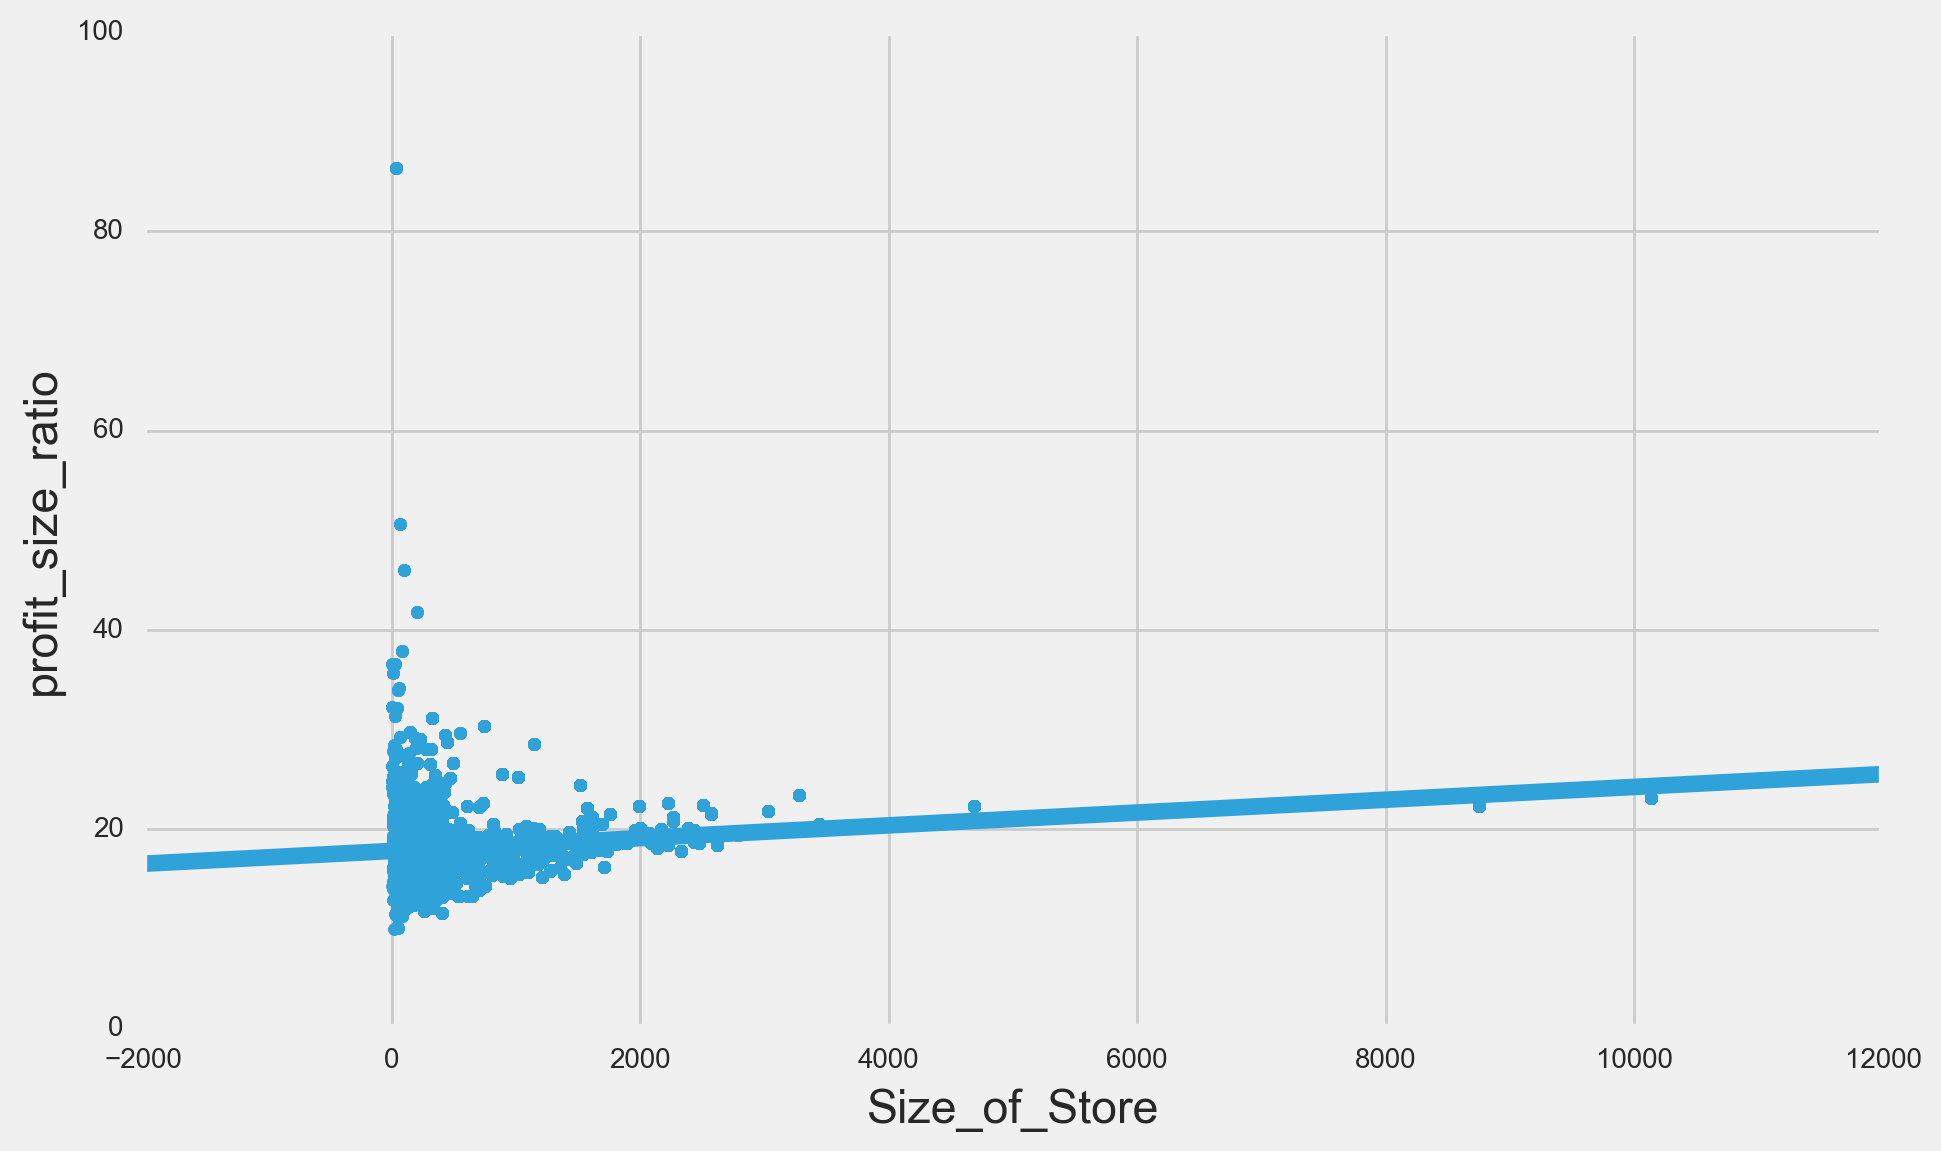

In [419]:
fig = plt.figure(figsize=(10,6))
sns.regplot(new2015['Size_of_Store'], new2015['profit_size_ratio'], data=new2015)
ax.set_title('Size and Profits')
plt.show()

In [420]:
new2015['profit_size_ratio'] = new2015['2015profits'] / new2015['Size_of_Store']
print new2015[['profit_size_ratio','Size_of_Store']].corr()

                   profit_size_ratio  Size_of_Store
profit_size_ratio           1.000000       0.277229
Size_of_Store               0.277229       1.000000


In [421]:
new2015['profit_size_ratio'] = new2015['daily_profit'] / new2015['Size_of_Store']
print new2015[['profit_size_ratio','Size_of_Store']].corr()

                   profit_size_ratio  Size_of_Store
profit_size_ratio           1.000000      -0.212692
Size_of_Store              -0.212692       1.000000


There is a higher correlation between the profit per size ratio and the yearly profits

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [422]:
new2015.Category_Name

0                           APRICOT BRANDIES
1                           APRICOT BRANDIES
2                        PEPPERMINT SCHNAPPS
3                          CANADIAN WHISKIES
4                  STRAIGHT BOURBON WHISKIES
5                             IRISH WHISKIES
6                               FLAVORED RUM
7                          CANADIAN WHISKIES
8                             CREAM LIQUEURS
9                             VODKA FLAVORED
10                         CANADIAN WHISKIES
11                       WATERMELON SCHNAPPS
12                 STRAIGHT BOURBON WHISKIES
13                         IMPORTED SCHNAPPS
14                                SPICED RUM
15                            VODKA FLAVORED
16                            VODKA FLAVORED
17                            VODKA 80 PROOF
18                                SPICED RUM
19                       BLACKBERRY BRANDIES
20                           SCOTCH WHISKIES
21                       PEPPERMINT SCHNAPPS
22        

http://stackoverflow.com/questions/16642022/numpy-where-on-string

We use this command to locate broader types of liquor

In [423]:
new2015['Liquor_Type'] = np.where(new2015['Category_Name'].str.contains('BRANDIES') , "BRANDIES",
            np.where(new2015['Category_Name'].str.contains('WHISKIES'), "WHISKIES",
            np.where(new2015['Category_Name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(new2015['Category_Name'].str.contains('SCOTCH'), "SCOTCH",
             np.where(new2015['Category_Name'].str.contains('GINS'), "GINS",
             np.where(new2015['Category_Name'].str.contains('VODKA'), "VODKA",
            np.where(new2015['Category_Name'].str.contains('ALCOHOL'), "ALCOHOL",
            np.where(new2015['Category_Name'].str.contains('COCKTAILS'), "COCKTAILS",
           np.where(new2015['Category_Name'].str.contains('LIQUEUR'), "LIQUEUR",
           np.where(new2015['Category_Name'].str.contains('GINS'), "GINS",
           np.where(new2015['Category_Name'].str.contains('RUM'), "RUM", "OTHER" )))))))))))
new2015.groupby(['Liquor_Type']).count()['Category'].reset_index()

Liquor_Type  Category
0      ALCOHOL       490
1     BRANDIES     12062
2    COCKTAILS      5619
3         GINS      8099
4      LIQUEUR     22615
5        OTHER     15002
6          RUM     26363
7     SCHNAPPS     12105
8       SCOTCH      1860
9        VODKA     56117
10    WHISKIES     56633

In [424]:
new2015

Date  Store_Number       City  Zip_Code  County_Number    County  \
0      2015-11-04          3717     SUMNER   50674.0              9    Bremer   
1      2015-06-10          3717     SUMNER   50674.0              9    Bremer   
2      2015-01-21          3717     SUMNER   50674.0              9    Bremer   
3      2015-11-11          3717     SUMNER   50674.0              9    Bremer   
4      2015-01-07          3717     SUMNER   50674.0              9    Bremer   
5      2015-02-18          3717     SUMNER   50674.0              9    Bremer   
6      2015-08-19          3717     SUMNER   50674.0              9    Bremer   
7      2015-12-09          3717     SUMNER   50674.0              9    Bremer   
8      2015-02-04          3717     SUMNER   50674.0              9    Bremer   
9      2015-12-22          3717     SUMNER   50674.0              9    Bremer   
10     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
11     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
12     2015-04-08          3717     SUMNER   50674.0              9    Bremer   
13     2015-01-14          3717     SUMNER   50674.0              9    Bremer   
14     2015-01-07          3717     SUMNER   50674.0              9    Bremer   
15     2015-11-23          3717     SUMNER   50674.0              9    Bremer   
16     2015-06-10          3717     SUMNER   50674.0              9    Bremer   
17     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
18     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
19     2015-11-04          3717     SUMNER   50674.0              9    Bremer   
20     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
21     2015-09-16          3717     SUMNER   50674.0              9    Bremer   
22     2015-01-21          3717     SUMNER   50674.0              9    Bremer   
23     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
24     2015-02-04          3717     SUMNER   50674.0              9    Bremer   
25     2015-03-04          3717     SUMNER   50674.0              9    Bremer   
26     2015-03-25          3717     SUMNER   50674.0              9    Bremer   
27     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
28     2015-12-16          3717     SUMNER   50674.0              9    Bremer   
29     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
30     2015-05-27          3717     SUMNER   50674.0              9    Bremer   
31     2015-07-22          3717     SUMNER   50674.0              9    Bremer   
32     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
33     2015-05-06          3717     SUMNER   50674.0              9    Bremer   
34     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
35     2015-12-29          3717     SUMNER   50674.0              9    Bremer   
36     2015-09-30          3717     SUMNER   50674.0              9    Bremer   
37     2015-04-29          3717     SUMNER   50674.0              9    Bremer   
38     2015-06-03          3717     SUMNER   50674.0              9    Bremer   
39     2015-09-02          3717     SUMNER   50674.0              9    Bremer   
40     2015-10-14          3717     SUMNER   50674.0              9    Bremer   
41     2015-04-01          3717     SUMNER   50674.0              9    Bremer   
42     2015-05-13          3717     SUMNER   50674.0              9    Bremer   
43     2015-08-05          3717     SUMNER   50674.0              9    Bremer   
44     2015-10-07          3717     SUMNER   50674.0              9    Bremer   
45     2015-11-11          3717     SUMNER   50674.0              9    Bremer   
46     2015-10-28          3717     SUMNER   50674.0              9    Bremer   
47     2015-07-15          3717     SUMNER   50674.0              9    Bremer   
48     2015-09-02          3717     SUMNER  

### 5.6 Do relationships exist between the broader liquor type and profit?

In [425]:
Profit_per_Liquor_Type_gall = new2015.groupby(['Liquor_Type']).mean()["profit_size_ratio"].reset_index()
Profit_per_Liquor_Type_gall.rename(columns={
 'profit_size_ratio':'average_profit_per_gallon_per_type'  
  }, inplace=True)
new2015= pd.merge(new2015, Profit_per_Liquor_Type_gall, on=['Liquor_Type'], how='right')
new2015

Date  Store_Number           City  Zip_Code  County_Number  \
0      2015-11-04          3717         SUMNER   50674.0              9   
1      2015-06-10          3717         SUMNER   50674.0              9   
2      2015-11-04          3717         SUMNER   50674.0              9   
3      2015-03-04          3717         SUMNER   50674.0              9   
4      2015-07-15          3717         SUMNER   50674.0              9   
5      2015-07-29          3717         SUMNER   50674.0              9   
6      2015-12-29          3717         SUMNER   50674.0              9   
7      2015-10-14          3717         SUMNER   50674.0              9   
8      2015-02-04          3717         SUMNER   50674.0              9   
9      2015-12-09          3717         SUMNER   50674.0              9   
10     2015-09-23          3717         SUMNER   50674.0              9   
11     2015-10-14          3717         SUMNER   50674.0              9   
12     2015-06-29          2651        WAVERLY   50677.0              9   
13     2015-10-13          2651        WAVERLY   50677.0              9   
14     2015-08-25          2651        WAVERLY   50677.0              9   
15     2015-12-15          2651        WAVERLY   50677.0              9   
16     2015-03-03          2651        WAVERLY   50677.0              9   
17     2015-10-20          2651        WAVERLY   50677.0              9   
18     2015-10-06          2651        WAVERLY   50677.0              9   
19     2015-12-08          2651        WAVERLY   50677.0              9   
20     2015-01-06          2651        WAVERLY   50677.0              9   
21     2015-12-08          2651        WAVERLY   50677.0              9   
22     2015-10-27          2651        WAVERLY   50677.0              9   
23     2015-11-03          2651        WAVERLY   50677.0              9   
24     2015-05-05          2651        WAVERLY   50677.0              9   
25     2015-07-07          2651        WAVERLY   50677.0              9   
26     2015-10-06          2651        WAVERLY   50677.0              9   
27     2015-10-27          2651        WAVERLY   50677.0              9   
28     2015-08-04          2651        WAVERLY   50677.0              9   
29     2015-12-08          2651        WAVERLY   50677.0              9   
30     2015-01-20          2651        WAVERLY   50677.0              9   
31     2015-10-20          2651        WAVERLY   50677.0              9   
32     2015-06-16          2651        WAVERLY   50677.0              9   
33     2015-02-17          2651        WAVERLY   50677.0              9   
34     2015-04-07          2651        WAVERLY   50677.0              9   
35     2015-12-01          2651        WAVERLY   50677.0              9   
36     2015-12-01          2651        WAVERLY   50677.0              9   
37     2015-07-28          2651        WAVERLY   50677.0              9   
38     2015-10-20          2651        WAVERLY   50677.0              9   
39     2015-12-15          2651        WAVERLY   50677.0              9   
40     2015-07-21          2651        WAVERLY   50677.0              9   
41     2015-05-05          2651        WAVERLY   50677.0              9   
42     2015-12-08          2651        WAVERLY   50677.0              9   
43     2015-08-11          2651        WAVERLY   50677.0              9   
44     2015-10-13          2651        WAVERLY   50677.0              9   
45     2015-11-21          2651        WAVERLY   50677.0              9   
46     2015-02-10          2651        WAVERLY   50677.0              9   
47     2015-01-27          2651        WAVERLY   50677.0              9   
48     2015-09-29          2651        WAVERLY   50677.0              9   
49     2015-03-24          2651        WAVERLY   50677.0              9   
50     2015-06-23          2651        WAVERLY   50677.0              9   
51     2015-05-12          2651        WAVERLY   50677.0              9   
52     2015-04-28          2651       

In [426]:
Profit_per_Liquor_Type = new2015.groupby(['Liquor_Type']).mean()['2015profits'].reset_index()
Profit_per_Liquor_Type.rename(columns={
 '2015profits':'average_yearly_profit_per_liquor_type'  
  }, inplace=True)
new2015= pd.merge(new2015, Profit_per_Liquor_Type, on=['Liquor_Type'], how='right')
new2015

Date  Store_Number           City  Zip_Code  County_Number  \
0      2015-11-04          3717         SUMNER   50674.0              9   
1      2015-06-10          3717         SUMNER   50674.0              9   
2      2015-11-04          3717         SUMNER   50674.0              9   
3      2015-03-04          3717         SUMNER   50674.0              9   
4      2015-07-15          3717         SUMNER   50674.0              9   
5      2015-07-29          3717         SUMNER   50674.0              9   
6      2015-12-29          3717         SUMNER   50674.0              9   
7      2015-10-14          3717         SUMNER   50674.0              9   
8      2015-02-04          3717         SUMNER   50674.0              9   
9      2015-12-09          3717         SUMNER   50674.0              9   
10     2015-09-23          3717         SUMNER   50674.0              9   
11     2015-10-14          3717         SUMNER   50674.0              9   
12     2015-06-29          2651        WAVERLY   50677.0              9   
13     2015-10-13          2651        WAVERLY   50677.0              9   
14     2015-08-25          2651        WAVERLY   50677.0              9   
15     2015-12-15          2651        WAVERLY   50677.0              9   
16     2015-03-03          2651        WAVERLY   50677.0              9   
17     2015-10-20          2651        WAVERLY   50677.0              9   
18     2015-10-06          2651        WAVERLY   50677.0              9   
19     2015-12-08          2651        WAVERLY   50677.0              9   
20     2015-01-06          2651        WAVERLY   50677.0              9   
21     2015-12-08          2651        WAVERLY   50677.0              9   
22     2015-10-27          2651        WAVERLY   50677.0              9   
23     2015-11-03          2651        WAVERLY   50677.0              9   
24     2015-05-05          2651        WAVERLY   50677.0              9   
25     2015-07-07          2651        WAVERLY   50677.0              9   
26     2015-10-06          2651        WAVERLY   50677.0              9   
27     2015-10-27          2651        WAVERLY   50677.0              9   
28     2015-08-04          2651        WAVERLY   50677.0              9   
29     2015-12-08          2651        WAVERLY   50677.0              9   
30     2015-01-20          2651        WAVERLY   50677.0              9   
31     2015-10-20          2651        WAVERLY   50677.0              9   
32     2015-06-16          2651        WAVERLY   50677.0              9   
33     2015-02-17          2651        WAVERLY   50677.0              9   
34     2015-04-07          2651        WAVERLY   50677.0              9   
35     2015-12-01          2651        WAVERLY   50677.0              9   
36     2015-12-01          2651        WAVERLY   50677.0              9   
37     2015-07-28          2651        WAVERLY   50677.0              9   
38     2015-10-20          2651        WAVERLY   50677.0              9   
39     2015-12-15          2651        WAVERLY   50677.0              9   
40     2015-07-21          2651        WAVERLY   50677.0              9   
41     2015-05-05          2651        WAVERLY   50677.0              9   
42     2015-12-08          2651        WAVERLY   50677.0              9   
43     2015-08-11          2651        WAVERLY   50677.0              9   
44     2015-10-13          2651        WAVERLY   50677.0              9   
45     2015-11-21          2651        WAVERLY   50677.0              9   
46     2015-02-10          2651        WAVERLY   50677.0              9   
47     2015-01-27          2651        WAVERLY   50677.0              9   
48     2015-09-29          2651        WAVERLY   50677.0              9   
49     2015-03-24          2651        WAVERLY   50677.0              9   
50     2015-06-23          2651        WAVERLY   50677.0              9   
51     2015-05-12          2651        WAVERLY   50677.0              9   
52     2015-04-28          2651       

In [427]:
gallons_per_type =new2015.groupby(['Liquor_Type']).mean()['Volume_Sold_Gall'].reset_index()
gallons_per_type.rename(columns={
 'Volume_Sold_Gall':'gallons_per_type'  
  }, inplace=True)
new2015= pd.merge(new2015, gallons_per_type, on=['Liquor_Type'], how='right')

In [428]:
new2015

Date  Store_Number           City  Zip_Code  County_Number  \
0      2015-11-04          3717         SUMNER   50674.0              9   
1      2015-06-10          3717         SUMNER   50674.0              9   
2      2015-11-04          3717         SUMNER   50674.0              9   
3      2015-03-04          3717         SUMNER   50674.0              9   
4      2015-07-15          3717         SUMNER   50674.0              9   
5      2015-07-29          3717         SUMNER   50674.0              9   
6      2015-12-29          3717         SUMNER   50674.0              9   
7      2015-10-14          3717         SUMNER   50674.0              9   
8      2015-02-04          3717         SUMNER   50674.0              9   
9      2015-12-09          3717         SUMNER   50674.0              9   
10     2015-09-23          3717         SUMNER   50674.0              9   
11     2015-10-14          3717         SUMNER   50674.0              9   
12     2015-06-29          2651        WAVERLY   50677.0              9   
13     2015-10-13          2651        WAVERLY   50677.0              9   
14     2015-08-25          2651        WAVERLY   50677.0              9   
15     2015-12-15          2651        WAVERLY   50677.0              9   
16     2015-03-03          2651        WAVERLY   50677.0              9   
17     2015-10-20          2651        WAVERLY   50677.0              9   
18     2015-10-06          2651        WAVERLY   50677.0              9   
19     2015-12-08          2651        WAVERLY   50677.0              9   
20     2015-01-06          2651        WAVERLY   50677.0              9   
21     2015-12-08          2651        WAVERLY   50677.0              9   
22     2015-10-27          2651        WAVERLY   50677.0              9   
23     2015-11-03          2651        WAVERLY   50677.0              9   
24     2015-05-05          2651        WAVERLY   50677.0              9   
25     2015-07-07          2651        WAVERLY   50677.0              9   
26     2015-10-06          2651        WAVERLY   50677.0              9   
27     2015-10-27          2651        WAVERLY   50677.0              9   
28     2015-08-04          2651        WAVERLY   50677.0              9   
29     2015-12-08          2651        WAVERLY   50677.0              9   
30     2015-01-20          2651        WAVERLY   50677.0              9   
31     2015-10-20          2651        WAVERLY   50677.0              9   
32     2015-06-16          2651        WAVERLY   50677.0              9   
33     2015-02-17          2651        WAVERLY   50677.0              9   
34     2015-04-07          2651        WAVERLY   50677.0              9   
35     2015-12-01          2651        WAVERLY   50677.0              9   
36     2015-12-01          2651        WAVERLY   50677.0              9   
37     2015-07-28          2651        WAVERLY   50677.0              9   
38     2015-10-20          2651        WAVERLY   50677.0              9   
39     2015-12-15          2651        WAVERLY   50677.0              9   
40     2015-07-21          2651        WAVERLY   50677.0              9   
41     2015-05-05          2651        WAVERLY   50677.0              9   
42     2015-12-08          2651        WAVERLY   50677.0              9   
43     2015-08-11          2651        WAVERLY   50677.0              9   
44     2015-10-13          2651        WAVERLY   50677.0              9   
45     2015-11-21          2651        WAVERLY   50677.0              9   
46     2015-02-10          2651        WAVERLY   50677.0              9   
47     2015-01-27          2651        WAVERLY   50677.0              9   
48     2015-09-29          2651        WAVERLY   50677.0              9   
49     2015-03-24          2651        WAVERLY   50677.0              9   
50     2015-06-23          2651        WAVERLY   50677.0              9   
51     2015-05-12          2651        WAVERLY   50677.0              9   
52     2015-04-28          2651       

In [429]:
gallons_per_type.sort(['gallons_per_type'], ascending=1, inplace=True)
print gallons_per_type.head(12)

   Liquor_Type  gallons_per_type
8       SCOTCH          0.788489
1     BRANDIES          1.303822
4      LIQUEUR          1.688280
7     SCHNAPPS          1.690900
3         GINS          1.755365
5        OTHER          1.851039
0      ALCOHOL          2.028592
10    WHISKIES          2.092612
6          RUM          2.320677
9        VODKA          2.393239
2    COCKTAILS          2.690052


/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [430]:
profit_per_type =new2015.groupby(['Liquor_Type']).mean()[['average_yearly_profit_per_liquor_type', 'average_profit_per_gallon_per_type']].reset_index()

profit_per_type.sort(['average_yearly_profit_per_liquor_type'], ascending=1, inplace=True)
print profit_per_type.head(20)

   Liquor_Type  average_yearly_profit_per_liquor_type  \
1     BRANDIES                           16463.857620   
10    WHISKIES                           18436.712073   
0      ALCOHOL                           18908.068816   
6          RUM                           19448.899805   
9        VODKA                           19791.261717   
2    COCKTAILS                           20107.667375   
4      LIQUEUR                           22503.337407   
7     SCHNAPPS                           23406.437963   
3         GINS                           24185.219379   
5        OTHER                           27050.343520   
8       SCOTCH                           34279.046801   

    average_profit_per_gallon_per_type  
1                             0.120180  
10                            0.130353  
0                             0.073811  
6                             0.122078  
9                             0.106762  
2                             0.050283  
4                           

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


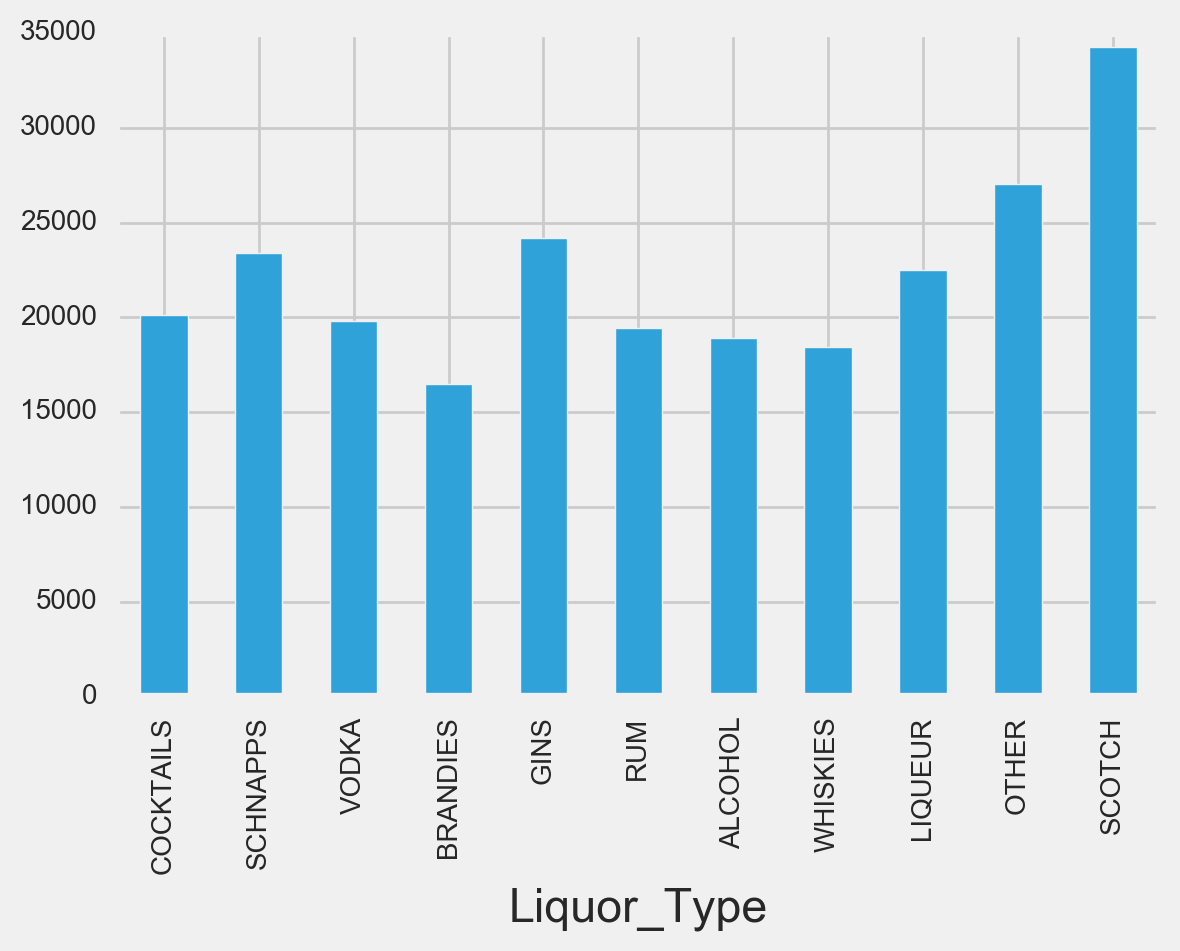

In [431]:
profits_per_type['average_yearly_profit_per_liquor_type'].plot(kind='bar')

Scotch is the one with the highest yearly profits

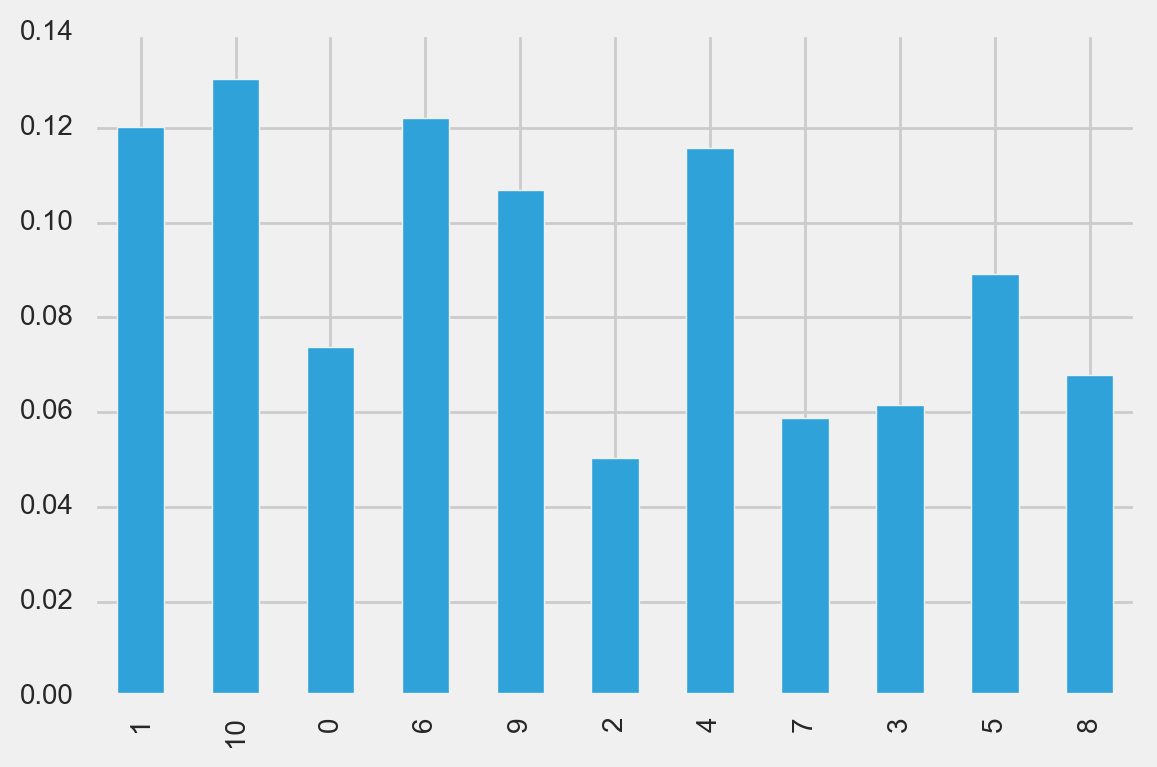

In [432]:
profit_per_type['average_profit_per_gallon_per_type'].plot(kind='bar')

However the type with highest profit per gallon is Whiskies

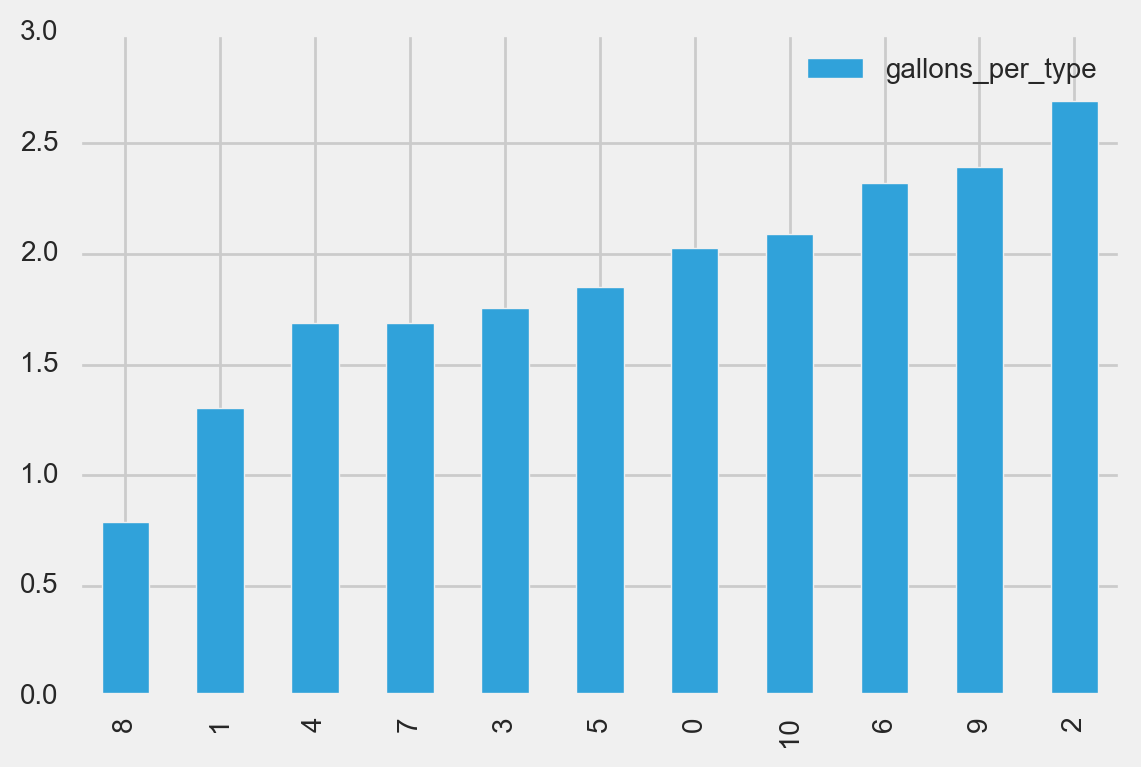

In [433]:
gallons_per_type.plot(kind='bar')

The type with the highest amount of gallons sold is Cocktails

### 5.7 are there any noticeable relationships between liquor brand and sales? Profit?

In [434]:
new2015['brand'] = new2015['Item_Description'].str.extract('([A-Z]\w{0,})', expand=True)
new2015.head(5)

Date  Store_Number    City  Zip_Code  County_Number  County  Category  \
0 2015-11-04          3717  SUMNER   50674.0              9  Bremer   1051100   
1 2015-06-10          3717  SUMNER   50674.0              9  Bremer   1051100   
2 2015-11-04          3717  SUMNER   50674.0              9  Bremer   1051110   
3 2015-03-04          3717  SUMNER   50674.0              9  Bremer   1051110   
4 2015-07-15          3717  SUMNER   50674.0              9  Bremer   1051100   

         Category_Name  Vendor_Number  Item_Number    ...     Profits_County  \
0     APRICOT BRANDIES             55        54436    ...           54516.09   
1     APRICOT BRANDIES             55        54436    ...           54516.09   
2  BLACKBERRY BRANDIES             55        55066    ...           54516.09   
3  BLACKBERRY BRANDIES            434        55086    ...           54516.09   
4     APRICOT BRANDIES             55        54436    ...           54516.09   

   Volume_Sold_Gall_County  profit_per_gallon_county  Size_of_Store  \
0                  3424.18                 15.920918         181.03   
1                  3424.18                 15.920918         181.03   
2                  3424.18                 15.920918         181.03   
3                  3424.18                 15.920918         181.03   
4                  3424.18                 15.920918         181.03   

   profit_size_ratio  Liquor_Type  average_profit_per_gallon_per_type  \
0           0.149147     BRANDIES                             0.12018   
1           0.049716     BRANDIES                             0.12018   
2           0.024858     BRANDIES                             0.12018   
3           0.015136     BRANDIES                             0.12018   
4           0.024858     BRANDIES                             0.12018   

   average_yearly_profit_per_liquor_type gallons_per_type      brand  
0                            16463.85762         1.303822         Mr  
1                            16463.85762         1.303822         Mr  
2                            16463.85762         1.303822         Mr  
3                            16463.85762         1.303822  Paramount  
4                            16463.85762         1.303822         Mr  

[5 rows x 35 columns]

In [435]:
new2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216965 entries, 0 to 216964
Data columns (total 35 columns):
Date                                     216965 non-null datetime64[ns]
Store_Number                             216965 non-null int64
City                                     216965 non-null object
Zip_Code                                 216780 non-null float64
County_Number                            216965 non-null int64
County                                   216965 non-null object
Category                                 216965 non-null int64
Category_Name                            216965 non-null object
Vendor_Number                            216965 non-null int64
Item_Number                              216965 non-null int64
Item_Description                         216965 non-null object
Bottle_Volume_ml                         216965 non-null int64
State_Bottle_Cost                        216965 non-null float64
State_Bottle_Retail                      216965 non-n

We need to create a variable for sales per brand

In [436]:
sales_brand =new2015.groupby(['brand']).mean()['sales2015_per_Store'].reset_index()
sales_brand.rename(columns={
  'sales2015_per_Store':'brand_sales'  
   }, inplace=True)
new2015= pd.merge(new2015, sales_brand, on=['brand'], how='right')

In [437]:
profit_brand_name = new2015.groupby(['brand']).sum()["2015profits"].reset_index()
profit_brand_name.rename(columns={
  '2015profits':'brand_profit'  
   }, inplace=True)
new2015= pd.merge(new2015, profit_brand_name, on=['brand'], how='right')

In [438]:
new2015.head(5)

Date  Store_Number     City  Zip_Code  County_Number  County  \
0 2015-11-04          3717   SUMNER   50674.0              9  Bremer   
1 2015-06-10          3717   SUMNER   50674.0              9  Bremer   
2 2015-11-04          3717   SUMNER   50674.0              9  Bremer   
3 2015-07-15          3717   SUMNER   50674.0              9  Bremer   
4 2015-12-08          2651  WAVERLY   50677.0              9  Bremer   

   Category        Category_Name  Vendor_Number  Item_Number      ...       \
0   1051100     APRICOT BRANDIES             55        54436      ...        
1   1051100     APRICOT BRANDIES             55        54436      ...        
2   1051110  BLACKBERRY BRANDIES             55        55066      ...        
3   1051100     APRICOT BRANDIES             55        54436      ...        
4   1051100     APRICOT BRANDIES             55        54436      ...        

  profit_per_gallon_county  Size_of_Store  profit_size_ratio  Liquor_Type  \
0                15.920918         181.03           0.149147     BRANDIES   
1                15.920918         181.03           0.049716     BRANDIES   
2                15.920918         181.03           0.024858     BRANDIES   
3                15.920918         181.03           0.024858     BRANDIES   
4                15.920918        1462.15           0.018466     BRANDIES   

   average_profit_per_gallon_per_type  average_yearly_profit_per_liquor_type  \
0                             0.12018                            16463.85762   
1                             0.12018                            16463.85762   
2                             0.12018                            16463.85762   
3                             0.12018                            16463.85762   
4                             0.12018                            16463.85762   

   gallons_per_type  brand   brand_sales  brand_profit  
0          1.303822     Mr  60922.730391    6249177.73  
1          1.303822     Mr  60922.730391    6249177.73  
2          1.303822     Mr  60922.730391    6249177.73  
3          1.303822     Mr  60922.730391    6249177.73  
4          1.303822     Mr  60922.730391    6249177.73  

[5 rows x 37 columns]

In [439]:
brand_sale_profit =new2015.groupby(['brand']).mean()[['brand_sales', 'brand_profit']]

In [440]:
brand_sale_profit.sort(['brand_profit'], ascending=1, inplace=True)
print brand_sale_profit.head(20)

               brand_sales  brand_profit
brand                                   
Gioia              5395.65       1804.56
Nuvo               8416.48       2815.35
Caipirinha         9427.17       3143.12
Fettercairn        9427.17       3143.12
Apricot            9427.17       3143.12
Nut                9427.17       3143.12
Dailuaine          9427.17       3143.12
Ginger             9427.17       3143.12
Cragabus           9427.17       3143.12
Conjure            9819.41       3275.67
Schoolcraft       10013.69       3342.18
Mandarin          11672.03       3900.63
Belle              7273.55       4861.98
Jumbie            17740.70       5924.51
Great              9427.17       6286.24
Grapefruit         9427.17       6286.24
Blair              9427.17       6286.24
Craigellachie      9427.17       6286.24
Braeval            9427.17       6286.24
Cerises            9427.17       6286.24


/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


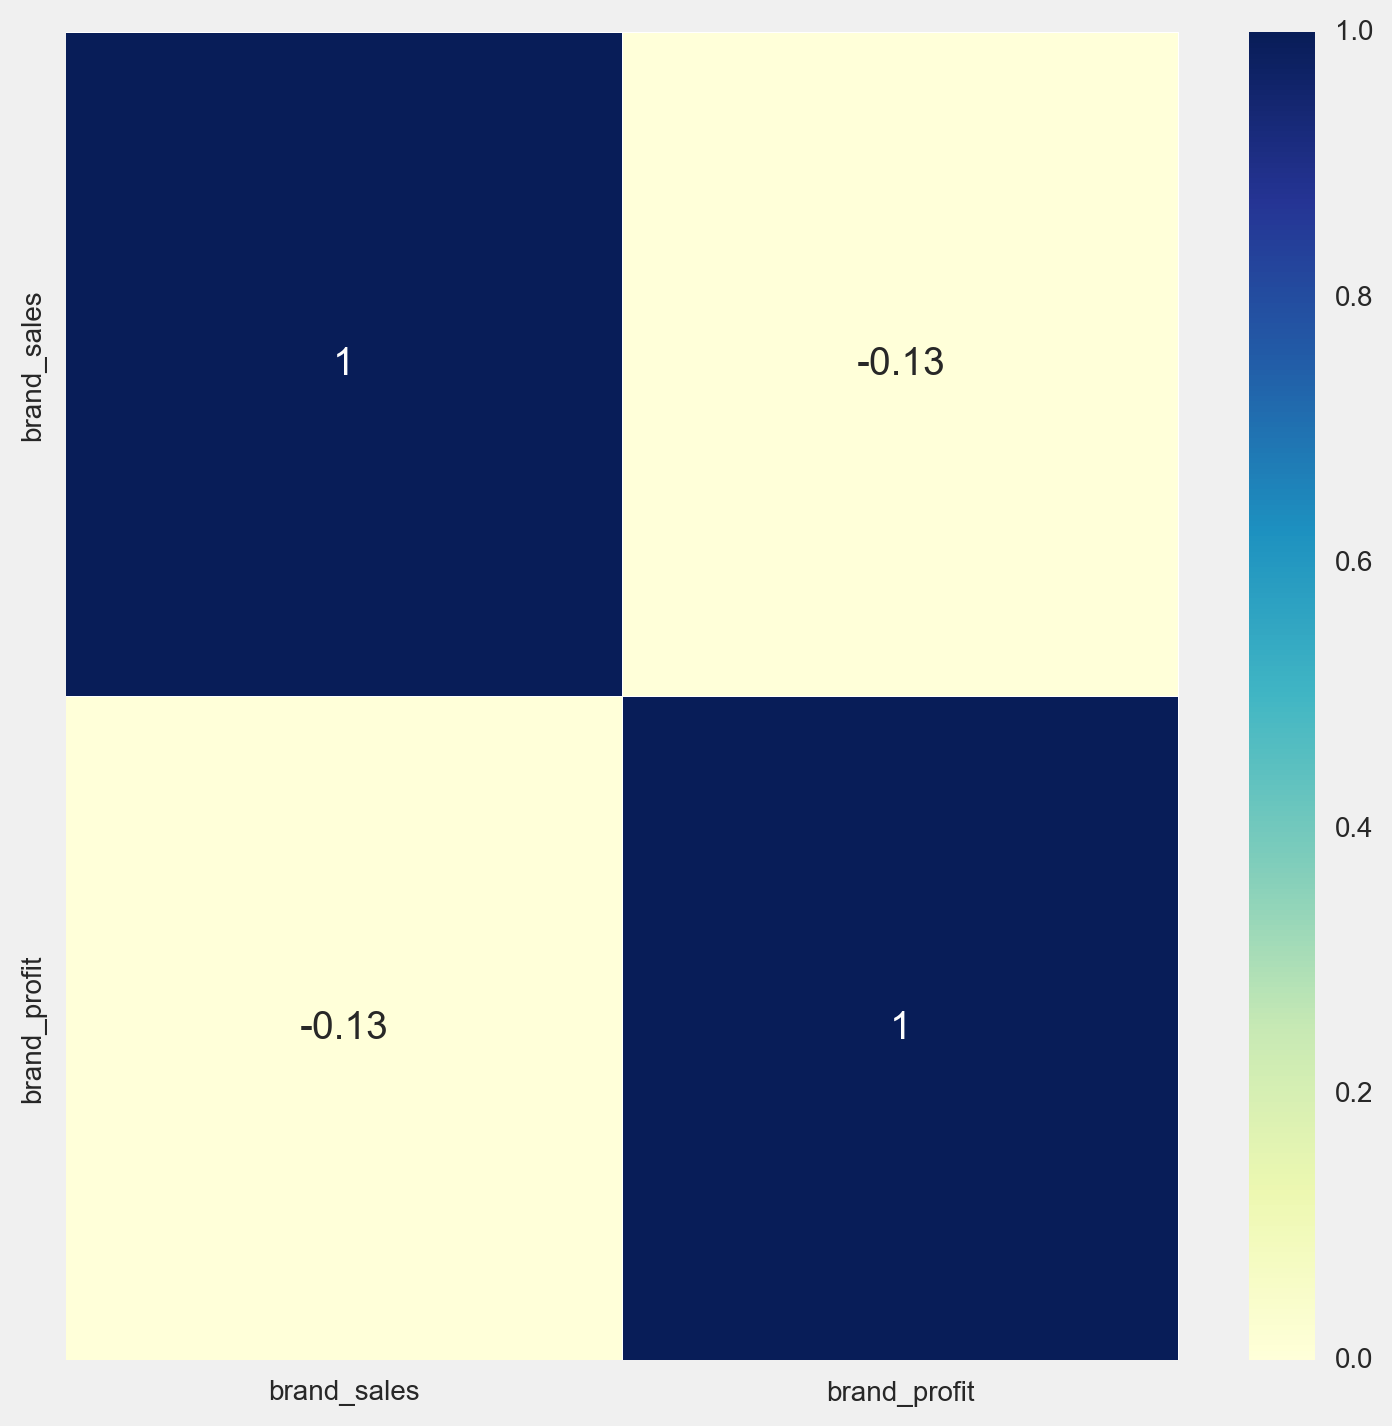

In [441]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.heatmap(brand_sale_profit.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

According with our results there are no strong relationship between the brands and the profits or sales

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [442]:
print profit_per_type.head(20)

   Liquor_Type  average_yearly_profit_per_liquor_type  \
1     BRANDIES                           16463.857620   
10    WHISKIES                           18436.712073   
0      ALCOHOL                           18908.068816   
6          RUM                           19448.899805   
9        VODKA                           19791.261717   
2    COCKTAILS                           20107.667375   
4      LIQUEUR                           22503.337407   
7     SCHNAPPS                           23406.437963   
3         GINS                           24185.219379   
5        OTHER                           27050.343520   
8       SCOTCH                           34279.046801   

    average_profit_per_gallon_per_type  
1                             0.120180  
10                            0.130353  
0                             0.073811  
6                             0.122078  
9                             0.106762  
2                             0.050283  
4                           

I think that based on the results it will be smart to implement taxes depending on the types of liquor, since some of them have high prices and allow the store owner to have have higher profits. In this case I would suggest to have a higher tax for Scotch. This kind of tax would not affect those small stores that are not able to sell the most expensive types of liquor compared to the bigger stores.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


Here I am putting a restriction on the data frame only for the 1st quarter of the 2015

In [443]:
Q2015= iowa[(iowa['Month'] == 1) |(iowa['Month'] == 2) |(iowa['Month'] == 3)]
Q2015= Q2015[(iowa['Year']!=2016) ]

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Here I am checking if there is any observation of the 2016

In [444]:
Q2015.loc[Q2015['Year']==2016]

Empty DataFrame
Columns: [Date, Store_Number, City, Zip_Code, County_Number, County, Category, Category_Name, Vendor_Number, Item_Number, Item_Description, Bottle_Volume_ml, State_Bottle_Cost, State_Bottle_Retail, Bottles_Sold, Sale_dollars, Volume_Sold_Lit, Volume_Sold_Gall, county, Month, Year]
Index: []

[0 rows x 21 columns]

Here I am doing the same for 2016

In [445]:
Q2016= iowa[(iowa['Month'] == 1) |(iowa['Month'] == 2) |(iowa['Month'] == 3)]
Q2016= Q2016[(iowa['Year']!=2015) ]
Q2016.loc[Q2016['Year']==2015]

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Empty DataFrame
Columns: [Date, Store_Number, City, Zip_Code, County_Number, County, Category, Category_Name, Vendor_Number, Item_Number, Item_Description, Bottle_Volume_ml, State_Bottle_Cost, State_Bottle_Retail, Bottles_Sold, Sale_dollars, Volume_Sold_Lit, Volume_Sold_Gall, county, Month, Year]
Index: []

[0 rows x 21 columns]

In [446]:
Q2015.loc[Q2015['Month']==12.0]

Empty DataFrame
Columns: [Date, Store_Number, City, Zip_Code, County_Number, County, Category, Category_Name, Vendor_Number, Item_Number, Item_Description, Bottle_Volume_ml, State_Bottle_Cost, State_Bottle_Retail, Bottles_Sold, Sale_dollars, Volume_Sold_Lit, Volume_Sold_Gall, county, Month, Year]
Index: []

[0 rows x 21 columns]

Here I am creating the columns for quarterly sum of sales and also mergin them to the main data frame

For 2015

In [447]:
Q2015_sum=Q2015.groupby(['Store_Number']).sum()['Sale_dollars'].reset_index()
Q2015_sum.rename(columns={
  'Sale_dollars':'Q1_Sales_2015'  
   }, inplace=True)
iowa= pd.merge(iowa, Q2015_sum, on=['Store_Number'], how='right')

For 2016

In [448]:
Q2016_sum=Q2016.groupby(['Store_Number']).sum()['Sale_dollars'].reset_index()
Q2016_sum.rename(columns={
  'Sale_dollars':'Q1_Sales_2016'  
   }, inplace=True)
iowa= pd.merge(iowa, Q2016_sum, on=['Store_Number'], how='right')

In [449]:
iowa.sort(['Store_Number','Year','Month'], ascending=True)

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Date  Store_Number         City  Zip_Code  County_Number  \
1636   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1667   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
1689   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1691   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
1723   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1741   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
1752   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1778   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1783   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1798   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1801   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1811   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1831   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1840   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1852   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1858   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1883   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1898   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1906   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1960   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
1964   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
1965   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
1989   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
1991   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
1993   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2027   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
2037   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2046   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2053   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2059   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2070   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2081   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2084   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
2104   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2115   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
2123   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2146   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
2171   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2174   2015-01-22        2106.0  CEDAR FALLS   50613.0            7.0   
2175   2015-01-15        2106.0  CEDAR FALLS   50613.0            7.0   
2208   2015-01-08        2106.0  CEDAR FALLS   50613.0            7.0   
2211   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2253   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
2264   2015-01-29        2106.0  CEDAR FALLS   50613.0            7.0   
1649   2015-02-12        2106.0  CEDAR FALLS   50613.0            7.0   
1670   2015-02-19        2106.0  CEDAR FALLS   50613.0            7.0   
1671   2015-02-19        2106.0  CEDAR FALLS   50613.0            7.0   
1740   2015-02-19        2106.0  CEDAR FALLS   50613.0            7.0   
1749   2015-02-19        2106.0  CEDAR FALLS   50613.0            7.0   
1755   2015-02-26        2106.0  CEDAR FALLS   50613.0            7.0   
1769   2015-02-19        2106.0  CEDAR FALLS   50613.0            7.0   
1771   2015-02-26        2106.0  CEDAR FALLS   50613.0            7.0   
1775   2015-02-05        2106.0  CEDAR FALLS   50613.0            7.0   
1817   2015-02-26        2106.0  CEDAR FALLS   50613.0            7.0  

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

Dropping missing variables

In [450]:
iowa_nonm= iowa.dropna()
iowa_nonm.isnull().sum()

Date                   0
Store_Number           0
City                   0
Zip_Code               0
County_Number          0
County                 0
Category               0
Category_Name          0
Vendor_Number          0
Item_Number            0
Item_Description       0
Bottle_Volume_ml       0
State_Bottle_Cost      0
State_Bottle_Retail    0
Bottles_Sold           0
Sale_dollars           0
Volume_Sold_Lit        0
Volume_Sold_Gall       0
county                 0
Month                  0
Year                   0
Q1_Sales_2015          0
Q1_Sales_2016          0
dtype: int64

Calculating the growth rates

In [451]:
iowa_nonm['sales_growth_rate']= ((iowa_nonm['Q1_Sales_2016'] - iowa_nonm['Q1_Sales_2015'])/iowa_nonm['Q1_Sales_2015'])*100
iowa_nonm

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Date  Store_Number            City  Zip_Code  County_Number  \
0      2015-11-04        3717.0          SUMNER   50674.0            9.0   
1      2015-06-10        3717.0          SUMNER   50674.0            9.0   
2      2015-01-21        3717.0          SUMNER   50674.0            9.0   
3      2015-11-11        3717.0          SUMNER   50674.0            9.0   
4      2015-01-07        3717.0          SUMNER   50674.0            9.0   
5      2015-02-18        3717.0          SUMNER   50674.0            9.0   
6      2016-03-23        3717.0          SUMNER   50674.0            9.0   
7      2015-08-19        3717.0          SUMNER   50674.0            9.0   
8      2015-12-09        3717.0          SUMNER   50674.0            9.0   
9      2016-02-10        3717.0          SUMNER   50674.0            9.0   
10     2015-02-04        3717.0          SUMNER   50674.0            9.0   
11     2016-03-02        3717.0          SUMNER   50674.0            9.0   
12     2016-01-13        3717.0          SUMNER   50674.0            9.0   
13     2016-03-09        3717.0          SUMNER   50674.0            9.0   
14     2015-12-22        3717.0          SUMNER   50674.0            9.0   
15     2016-01-20        3717.0          SUMNER   50674.0            9.0   
16     2015-04-29        3717.0          SUMNER   50674.0            9.0   
17     2016-02-10        3717.0          SUMNER   50674.0            9.0   
18     2015-10-28        3717.0          SUMNER   50674.0            9.0   
19     2015-04-08        3717.0          SUMNER   50674.0            9.0   
20     2015-01-14        3717.0          SUMNER   50674.0            9.0   
21     2015-01-07        3717.0          SUMNER   50674.0            9.0   
22     2015-11-23        3717.0          SUMNER   50674.0            9.0   
23     2016-03-16        3717.0          SUMNER   50674.0            9.0   
24     2015-06-10        3717.0          SUMNER   50674.0            9.0   
25     2015-08-05        3717.0          SUMNER   50674.0            9.0   
26     2015-10-28        3717.0          SUMNER   50674.0            9.0   
27     2016-03-16        3717.0          SUMNER   50674.0            9.0   
28     2016-01-27        3717.0          SUMNER   50674.0            9.0   
29     2015-11-04        3717.0          SUMNER   50674.0            9.0   
30     2015-09-16        3717.0          SUMNER   50674.0            9.0   
31     2016-03-09        3717.0          SUMNER   50674.0            9.0   
32     2015-09-16        3717.0          SUMNER   50674.0            9.0   
33     2015-01-21        3717.0          SUMNER   50674.0            9.0   
34     2016-03-16        3717.0          SUMNER   50674.0            9.0   
35     2015-10-28        3717.0          SUMNER   50674.0            9.0   
36     2015-02-04        3717.0          SUMNER   50674.0            9.0   
37     2015-03-04        3717.0          SUMNER   50674.0            9.0   
38     2016-03-23        3717.0          SUMNER   50674.0            9.0   
39     2015-03-25        3717.0          SUMNER   50674.0            9.0   
40     2015-04-01        3717.0          SUMNER   50674.0            9.0   
41     2015-12-16        3717.0          SUMNER   50674.0            9.0   
42     2015-05-13        3717.0          SUMNER   50674.0            9.0   
43     2015-05-27        3717.0          SUMNER   50674.0            9.0   
44     2015-07-22        3717.0          SUMNER   50674.0            9.0   
45     2016-01-06        3717.0          SUMNER   50674.0            9.0   
46     2015-07-15        3717.0          SUMNER   50674.0            9.0   
47     2015-05-06        3717.0          SUMNER   50674.0            9.0   
48     2015-07-15        3717.0          SUMNER   50674.0            9.0   
49     2015-12-29        3717.0          SUMNER   50674.0            9.0   
50     2015-09-30        3717.0          SUMNER   50674.0            9.0   
51     2015-04-29        3717.0          SUMNER   50674.0    

I'm creating a dataset where I have  counties that have the sum of quarterly sales in 2016
above 40,000USD and growth rate of sales is above 50%

In [452]:
performance = iowa_nonm.loc[(iowa_nonm['Q1_Sales_2016']>40000) & (iowa_nonm['sales_growth_rate']>50)]
performance.sort(['sales_growth_rate'], ascending=False)

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Date  Store_Number          City  Zip_Code  County_Number County  \
176659 2015-04-09        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177184 2015-11-24        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177212 2015-11-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177213 2015-06-04        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177214 2015-12-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177215 2016-01-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177216 2015-03-26        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177217 2015-07-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177218 2015-03-26        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177219 2015-04-13        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177220 2016-03-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177221 2015-02-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177222 2016-03-03        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177223 2015-12-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177224 2015-02-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177225 2015-10-08        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177226 2016-02-25        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177227 2015-12-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177228 2016-02-11        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177229 2015-07-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177230 2015-03-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177231 2015-02-26        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177232 2015-10-01        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177233 2015-05-11        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177234 2015-02-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177211 2015-08-27        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177210 2015-07-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177209 2015-07-30        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177196 2016-01-21        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177186 2016-01-21        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177187 2016-02-08        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177188 2015-10-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177189 2015-02-05        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177190 2015-05-07        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177191 2015-08-20        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177192 2015-11-05        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177193 2015-07-09        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177194 2015-10-22        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177195 2015-04-09        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177197 2016-03-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177208 2016-03-31        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177198 2016-02-04        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177199 2015-10-08        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177200 2016-02-18        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177201 2015-03-05        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177202 2015-10-15        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177203 2016-01-28        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177204 2015-07-30        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
177205 2015-03-26        5102.0  MOUNT VERNO

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

I recommend Pottawattamie in Council Bluffs

In [453]:
performance.loc[performance['County']=='Linn']

Date  Store_Number          City  Zip_Code  County_Number County  \
176659 2015-04-09        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176660 2016-01-07        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176661 2015-07-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176662 2015-07-16        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176663 2015-05-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176664 2016-03-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176665 2015-02-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176666 2015-05-21        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176667 2015-09-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176668 2015-12-23        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176669 2015-08-13        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176670 2016-03-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176671 2015-02-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176672 2016-01-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176673 2016-02-18        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176674 2015-03-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176675 2015-06-18        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176676 2015-12-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176677 2015-10-01        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176678 2015-09-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176679 2016-03-07        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176680 2015-09-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176681 2016-01-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176682 2016-03-07        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176683 2016-01-04        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176684 2015-12-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176685 2016-01-04        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176686 2016-01-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176687 2015-11-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176688 2015-11-05        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176689 2015-10-29        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176690 2015-05-21        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176691 2015-11-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176692 2015-09-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176693 2015-09-17        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176694 2015-09-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176695 2016-03-10        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176696 2015-02-19        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176697 2015-09-03        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176698 2015-07-23        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176699 2015-10-29        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176700 2015-10-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176701 2016-01-14        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176702 2015-06-25        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176703 2015-02-12        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176704 2015-03-30        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176705 2015-03-05        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176706 2015-05-18        5102.0  MOUNT VERNON   52314.0           57.0   Linn   
176707 2015-11-30        5102.0  MOUNT VERNO

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

Creating types of liquor

In [454]:
iowa['Liquor_Type'] = np.where(iowa['Category_Name'].str.contains('BRANDIES') , "BRANDIES",
            np.where(iowa['Category_Name'].str.contains('WHISKIES'), "WHISKIES",
            np.where(iowa['Category_Name'].str.contains('SCHNAPPS'), "SCHNAPPS",  
            np.where(iowa['Category_Name'].str.contains('SCOTCH'), "SCOTCH",
             np.where(iowa['Category_Name'].str.contains('GINS'), "GINS",
             np.where(iowa['Category_Name'].str.contains('VODKA'), "VODKA",
            np.where(iowa['Category_Name'].str.contains('ALCOHOL'), "ALCOHOL",
            np.where(iowa['Category_Name'].str.contains('COCKTAILS'), "COCKTAILS",
           np.where(iowa['Category_Name'].str.contains('LIQUEUR'), "LIQUEUR",
           np.where(iowa['Category_Name'].str.contains('GINS'), "GINS",
           np.where(iowa['Category_Name'].str.contains('RUM'), "RUM", "OTHER" )))))))))))

Total Cost and profit per item

In [455]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257342 entries, 0 to 257341
Data columns (total 24 columns):
Date                   257221 non-null datetime64[ns]
Store_Number           257342 non-null float64
City                   257221 non-null object
Zip_Code               257005 non-null float64
County_Number          257221 non-null float64
County                 257221 non-null object
Category               257221 non-null float64
Category_Name          257221 non-null object
Vendor_Number          257221 non-null float64
Item_Number            257221 non-null float64
Item_Description       257221 non-null object
Bottle_Volume_ml       257221 non-null float64
State_Bottle_Cost      257221 non-null object
State_Bottle_Retail    257221 non-null object
Bottles_Sold           257221 non-null float64
Sale_dollars           257221 non-null float64
Volume_Sold_Lit        257221 non-null float64
Volume_Sold_Gall       257221 non-null float64
county                 257221 non-null obj

In [456]:
iowa['State_Bottle_Cost']= iowa['State_Bottle_Cost'].apply(float)
iowa['State_Bottle_Retail']= iowa['State_Bottle_Retail'].apply(float)

In [457]:
iowa['total_cost']=iowa['State_Bottle_Cost']*iowa['Bottles_Sold']
iowa['profit']= iowa['Sale_dollars']- iowa['total_cost']

Since we want to know the average profits within each type of liquor, within  each city, and county 
to be able to suggest a location

In [458]:
profitclt=iowa.groupby([iowa['County'], iowa['Liquor_Type']]).mean()["profit"].reset_index()
profitclt.rename(columns={
  'profit':'profits_city_liquor_type'  
   }, inplace=True)
iowa= pd.merge(iowa, profitclt, on=['County','Liquor_Type'], how='right')

Sorting to locate the maximum average profit 

In [459]:
profitclt.sort(['profits_city_liquor_type'], ascending=False )

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


County Liquor_Type  profits_city_liquor_type
259          Dallas      SCOTCH                370.311905
183        Cherokee      SCOTCH                100.000000
868          Shelby   COCKTAILS                 93.709286
500            Iowa      SCOTCH                 84.123333
707          Monroe     ALCOHOL                 81.000000
44          Audubon         RUM                 79.500000
43          Audubon     LIQUEUR                 78.000000
426         Hancock      SCOTCH                 73.245000
254          Dallas        GINS                 67.548830
888           Story     ALCOHOL                 67.540800
811            Polk      SCOTCH                 65.941545
355           Floyd         RUM                 65.373977
536         Johnson     ALCOHOL                 63.051000
822   Pottawattamie      SCOTCH                 62.160577
293        Delaware    WHISKIES                 61.763317
1053        missing    WHISKIES                 60.766667
729       Muscatine     ALCOHOL                 60.576667
137         Carroll         RUM                 60.366475
316         Dubuque     ALCOHOL                 60.187500
464          Howard     LIQUEUR                 59.716849
57       Black Hawk     ALCOHOL                 59.250000
863           Scott      SCOTCH                 58.888354
544         Johnson      SCOTCH                 58.792570
373         Fremont         RUM                 58.200000
885           Sioux      SCOTCH                 57.918000
541         Johnson       OTHER                 57.828731
588            Linn     ALCOHOL                 57.782857
435          Hardin         RUM                 57.679206
261          Dallas    WHISKIES                 57.373042
256          Dallas       OTHER                 57.227514
131         Carroll     ALCOHOL                 56.700000
860           Scott       OTHER                 56.508972
324         Dubuque      SCOTCH                 55.545072
344         Fayette         RUM                 54.923500
530       Jefferson       OTHER                 54.227200
987         Webster         RUM                 54.184370
141         Carroll    WHISKIES                 54.004040
338         Fayette     ALCOHOL                 54.000000
609           Lucas     ALCOHOL                 54.000000
918           Union     ALCOHOL                 54.000000
186       Chickasaw     ALCOHOL                 54.000000
229         Clinton     ALCOHOL                 54.000000
1025          Worth     ALCOHOL                 54.000000
440        Harrison     ALCOHOL                 54.000000
761            Page     ALCOHOL                 54.000000
142            Cass     ALCOHOL                 54.000000
631         Madison     ALCOHOL                 54.000000
525       Jefferson     ALCOHOL                 54.000000
470        Humboldt     ALCOHOL                 54.000000
407        Hamilton     ALCOHOL                 54.000000
866          Shelby     ALCOHOL                 54.000000
327           Emmet     ALCOHOL                 54.000000
283        Delaware     ALCOHOL                 54.000000
255          Dallas     LIQUEUR                 53.937266
353           Floyd     LIQUEUR                 53.867907
887           Sioux    WHISKIES                 53.634578
359           Floyd    WHISKIES                 53.543750
546         Johnson    WHISKIES                 53.361898
540         Johnson     LIQUEUR                 53.249441
808            Polk       OTHER                 53.178287
437          Hardin      SCOTCH                 53.000000
807            Polk     LIQUEUR                 52.983198
354           Floyd       OTHER                 52.531923
664        Marshall     ALCOHOL                 51.750000
819   Pottawattamie       OTHER                 51.367593
1018       Woodbury     LIQUEUR                 51.225382
528       Jefferson        GINS                 51.080476
986         Webster       OTHER                 50.939128
1019       

To suggest to my client what other liquors he/she might specialize in, I need to see the profits
for other types in the county of Dallas

In [460]:
profitclt.loc[profitclt['County']=='Dallas'].sort(['profits_city_liquor_type'], ascending=False)

/Users/feliperodriguez/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


County Liquor_Type  profits_city_liquor_type
259  Dallas      SCOTCH                370.311905
254  Dallas        GINS                 67.548830
261  Dallas    WHISKIES                 57.373042
256  Dallas       OTHER                 57.227514
255  Dallas     LIQUEUR                 53.937266
260  Dallas       VODKA                 42.029640
257  Dallas         RUM                 34.780929
252  Dallas    BRANDIES                 34.207612
251  Dallas     ALCOHOL                 22.500000
253  Dallas   COCKTAILS                 22.138316
258  Dallas    SCHNAPPS                 15.984600

Based on these results I would suggest to sell either Scotch in the County of Dallas, it is by the one with the highest profits